# opencv load pytorch model

In [23]:
# 准备简单模型测试
import torch
import torch.nn as nn
class SimpleModule(nn.Module):
    def __init__(self):
        super(SimpleModule, self).__init__()
        #  3*2*2
        self.line = nn.Linear(3072,10)
    def forward(self,x):
        x = x.reshape(x.shape[0], 3072)
        output = self.line(x)
        return output

mod = SimpleModule()
# input_x = torch.Tensor([1,2])
# print(input_x)
# with torch.no_grad():
#     print(mod.forward(input_x))
torch.save(mod, 'simple.pkl')

d:\project_tw\twedu\venv37\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SimpleModule. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [57]:
import torch
import torchvision
from torch.autograd import Variable
# 
model = torch.load('d:\\img\\ocr\\model\\crnn_custom.pkl')
# dummy_input = torch.randn(1, 3,28, 28,device='cpu')
dummy_input = torch.randn(1, 1,32, 100,device='cpu')

# print(dummy_input.shape)
torch.onnx.export(model, dummy_input,'d:\\img\\ocr\\model\\crnn_custom.onnx', verbose=True)
# net = cv2.dnn.readNetFromONNX('d:\\img\\ocr\\model\\single.onnx')
print(model)


d:\project_tw\twedu\venv37\lib\site-packages\ipykernel_launcher.py:66: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!


graph(%input.1 : Float(1, 1, 32, 100),
      %cnn.conv0.weight : Float(64, 1, 3, 3),
      %cnn.conv0.bias : Float(64),
      %cnn.conv1.weight : Float(128, 64, 3, 3),
      %cnn.conv1.bias : Float(128),
      %cnn.conv2.weight : Float(256, 128, 3, 3),
      %cnn.conv2.bias : Float(256),
      %cnn.batchnorm2.weight : Float(256),
      %cnn.batchnorm2.bias : Float(256),
      %cnn.batchnorm2.running_mean : Float(256),
      %cnn.batchnorm2.running_var : Float(256),
      %cnn.batchnorm2.num_batches_tracked : Long(),
      %cnn.conv3.weight : Float(256, 256, 3, 3),
      %cnn.conv3.bias : Float(256),
      %cnn.conv4.weight : Float(512, 256, 3, 3),
      %cnn.conv4.bias : Float(512),
      %cnn.batchnorm4.weight : Float(512),
      %cnn.batchnorm4.bias : Float(512),
      %cnn.batchnorm4.running_mean : Float(512),
      %cnn.batchnorm4.running_var : Float(512),
      %cnn.batchnorm4.num_batches_tracked : Long(),
      %cnn.conv5.weight : Float(512, 512, 3, 3),
      %cnn.conv5.bias : Fl

)


In [58]:
import cv2
import onnx
# net = cv2.dnn.readNetFromTorch('d:\\img\\ocr\\model\\single.onnx',isBinary=True)
# model = onnx.load("d:\\img\\ocr\\model\\crnn_custom.onnx")
# print(model)
# onnx.checker.check_model(model)
# onnx.helper.printable_graph(model.graph)
# print(onnx)
# mod = 
net = cv2.dnn.readNetFromONNX('d:\\img\\ocr\\model\\crnn_custom.onnx')

# img = cv2.imread('D:\\img\\dataset\\2\\6.png')
# img = cv2.imread('D:\\img\\test_test.png')
# blob = cv2.dnn.blobFromImage(img, 1.0, (28, 28))/255.

# # print(blob)
# print(blob.shape)
# net.setInput(blob)
# pred = net.forward()
# print(np.argmax(pred[0]))
# print('pred -->{}'.forward(pred))

In [177]:
??cv2.dnn.readNetFromONNX

# simple digit recognition

## 数据准备

In [37]:
from PIL import Image
from PIL import ImageDraw
from PIL import ImageFont
import matplotlib.pyplot as plt
import random
import numpy as np
import os
import cv2

# 截取图片生成前景图片
def clip_background(size=(28,28), number = 5):
    base_path = 'D:\\img\\dataset\\origin'
    b_image_path = 'D:\\img\\dataset\\background'
    file_lists = ['{}\\{}'.format(base_path, x) for x in os.listdir(base_path)]
    for fidx,item in enumerate(file_lists):
        print(item)

        b_image = cv2.imread(item,cv2.IMREAD_COLOR)
        for idx in range(number):
            x = np.random.randint(b_image.shape[1]-32)
            y = np.random.randint(b_image.shape[0]-32)
            b_crop_img = b_image[y:y+size[0], x:x+size[1]]
            cv2.imwrite('{}\\bg_{}_{}.png'.format(b_image_path,fidx,idx), b_crop_img)

def getRandomStr():
    """
    获取一个随机数字，每个数字的颜色也是随机的
    :return:
    """
    random_num = str(random.randint(0, 9))
    return random_num

charasets = [['ARLRDBD.TTF',(7,1)],
             ['simfang.ttf',(8,2)],
             ['simhei.ttf',(8,2)],
             ['STKAITI.TTF',(8,-1)] ]
b_image_path = 'D:\\img\\dataset\\background'
bg_file_lists = ['{}\\{}'.format(b_image_path, x) for x in os.listdir(b_image_path)]

other_char = '.,'
# 定义一个各通道值 0-255范围 超出按截断处理
def ext(pv):
    if pv > 255:
        return 255
    if pv < 0:
        return 0
    else:
        return pv
    
# 高斯噪点的生成
def gauss_noise(image):
    h, w, ch = image.shape
    for row in range(h):
        for col in range(w):
        
        	# numpy.random.normal(loc, scale, size)生成高斯分布的概率密度随机数
        	# loc：float代表生成的高斯分布的随机数的均值
        	# scale：float 代表这个分布的方差
        	# size：int or tuple of ints 输出的shape，默认为None，只输出一个值 
        	# 当指定整数时，输出整数个值，也可以输出（a, b）→ a 行 b 列
            s = np.random.normal(0, 10, 3)
            # 去除每一个像素的三个通道值
            b = image[row, col, 0]
            g = image[row, col, 1]
            r = image[row, col, 2]
            # 在每一个像素的三个通道值上加上高斯噪声
            image[row, col, 0] = int(ext(b + s[0]))
            image[row, col, 1] = int(ext(g + s[1]))
            image[row, col, 2] = int(ext(r + s[2]))

def generate_captcha(label, 
                     font_type_path='D:\\img\\charaset', 
                     font_type_idx=0,
                     dataset_path='d:\\img\\dataset', 
                     number = 10):
    for idx in range(number):
        # 获取一个Image对象，参数分别是RGB模式。宽150，高30， 随机颜色
        # image = Image.fromarray(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) 
        #         image = Image.new('RGB', (28, 28), (255,255,255))
        
        # 获取一个画笔对象，将图片对象传过去
        font_idx = font_type_idx
        bg_img = cv2.imread(bg_file_lists[np.random.randint(len(bg_file_lists))],cv2.IMREAD_COLOR)
        image = Image.fromarray(cv2.cvtColor(bg_img,cv2.COLOR_BGR2RGB)) 
        draw = ImageDraw.Draw(image)
        # 获取一个font字体对象参数是ttf的字体文件的目录，以及字体的大小
        if font_type_idx == -1:
            font_idx = np.random.randint(len(charasets))
        font_type = '{}\\{}'.format(font_type_path,charasets[font_idx][0])
#         print('font type -->',font_type)
        font = ImageFont.truetype(font_type, size=18)
        # 在图片上写东西，参数是：定位，字符串，颜色，字体
        x = charasets[font_idx][1][0]
        y = charasets[font_idx][1][1]
        if np.random.randint(10)>=5:
            x = x - np.random.randint(3)
            y = y - np.random.randint(2)
        else:
            x = x + np.random.randint(3)
            y = y + np.random.randint(2)
            
        if label == 10:
            draw.text((x,y), other_char[np.random.randint(len(other_char))], (0,0,0), font=font)
        else:
            draw.text((x,y), str(label), (0,0,0), font=font)
        #   旋转一些角度
        image = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)  

        if np.random.randint(10)>=7:
            image = cv2.GaussianBlur(image,(0,0),0.95)
            
#         if np.random.randint(10)>=7:
#             (h, w) = image.shape[:2]
#             center = (w // 2, h // 2)
#             M = cv2.getRotationMatrix2D(center, random.randint(5,10), 1.0)
#             image = cv2.warpAffine(image, M, (w, h),flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)    
            
        cv2.imwrite('{}\\{}\\n_{}.png'.format(dataset_path, label, idx), image)
        
# clip_background()
for digit in range(11):
    if digit == 10:
        generate_captcha(label=digit,font_type_idx=-1, number=1000)
    else:
        generate_captcha(label=digit,font_type_idx=-1, number=1000)

print('handle over ....')

handle over ....


## 创建训练数据集

In [38]:
# https://github.com/pytorch/vision/issues/81
# 将图片数据写入到LMDB数据库存中
import lmdb
import glob
import random
import os
import cv2

def checkImageIsValid(imageBin):
    if imageBin is None:
        return False
    
    imageBuf = np.frombuffer(imageBin, dtype=np.uint8)
    img = cv2.imdecode(imageBuf, cv2.IMREAD_COLOR)
    if img is None:
        return False
    imgH, imgW = img.shape[0], img.shape[1]
    if imgH * imgW == 0:
        return False
    return True

def createDataset(outputPath, imagePathList, labelList, lexiconList=None, checkValid=True):
    """
    Create LMDB dataset for CRNN training.
    ARGS:
        outputPath    : LMDB output path
        imagePathList : list of image path
        labelList     : list of corresponding groundtruth texts
        lexiconList   : (optional) list of lexicon lists
        checkValid    : if true, check the validity of every image
    """
    # print (len(imagePathList) , len(labelList))
    assert (len(imagePathList) == len(labelList))
    nSamples = len(imagePathList)
    
    env = lmdb.open(outputPath, map_size=511627776)
    
    cache = {}
    cnt = 1
    for i in range(nSamples):
        imagePath = imagePathList[i]
        label = labelList[i]
        if not os.path.exists(imagePath):
            print('%s does not exist' % imagePath)
            continue
        with open(imagePath, 'rb') as f:
            imageBin = f.read()
        
        if checkValid:
            if not checkImageIsValid(imageBin):
                print('%s is not a valid image' % imagePath)
                continue

        imageKey = 'image-%09d' % cnt
        labelKey = 'label-%09d' % cnt
        cache[imageKey] = imageBin
        cache[labelKey] = label.encode()
        if lexiconList:
            lexiconKey = 'lexicon-%09d' % cnt
            cache[lexiconKey] = ' '.join(lexiconList[i]).encode()
        if cnt % 1000 == 0:
            writeCache(env, cache)
            cache = {}
            print('Written %d / %d' % (cnt, nSamples))
        cnt += 1
    nSamples = cnt - 1
    cache['num-samples'] = str(nSamples).encode()
    writeCache(env, cache)
    print('Created dataset with %d samples' % nSamples)

def writeCache(env, cache):
    with env.begin(write=True) as txn:
        for k, v in cache.items():
            txn.put(k.encode(), v)
            
def read_text(path):
    with open(path) as f:
        text = f.read()
    text = text.strip()

    return text

path = 'D:\\img\\dataset\\{}\\*.png'
imgLabelLists = []

for l in range(11):
    image_path = path.format(l)
#     print(image_path)
    imagePathList = glob.glob(image_path)
#     print(imagePathList)
    for p in imagePathList:
        try:
            imgLabelLists.append((p,str(l)))
        except:
            continue
# print(imgLabelLists)
random.shuffle(imgLabelLists)
trainPath = 'D:\\img\\dataset\\train'   # 训练数据
trainImgPaths = [x[0] for x in imgLabelLists]
trainTxtLists = [x[1] for x in imgLabelLists]
createDataset(trainPath, trainImgPaths, trainTxtLists, lexiconList=None, checkValid=True)


Written 1000 / 33000
Written 2000 / 33000
Written 3000 / 33000
Written 4000 / 33000
Written 5000 / 33000
Written 6000 / 33000
Written 7000 / 33000
Written 8000 / 33000
Written 9000 / 33000
Written 10000 / 33000
Written 11000 / 33000
Written 12000 / 33000
Written 13000 / 33000
Written 14000 / 33000
Written 15000 / 33000
Written 16000 / 33000
Written 17000 / 33000
Written 18000 / 33000
Written 19000 / 33000
Written 20000 / 33000
Written 21000 / 33000
Written 22000 / 33000
Written 23000 / 33000
Written 24000 / 33000
Written 25000 / 33000
Written 26000 / 33000
Written 27000 / 33000
Written 28000 / 33000
Written 29000 / 33000
Written 30000 / 33000
Written 31000 / 33000
Written 32000 / 33000
Written 33000 / 33000
Created dataset with 33000 samples


## 读取训练数据

In [1]:
import lib.dataset as dataset
import importlib
import torch
importlib.reload(dataset)
path = 'D:\\img\\dataset\\train'
# train_dataset = dataset.lmdbDataset(root=path, transform=dataset.resizeNormalize((28,28)))
train_dataset = dataset.lmdbDataset(root=path, transform=None)
print(len(train_dataset))
# 分隔训练集，验证集
train_set, val_set = torch.utils.data.random_split(train_dataset,[int(0.9*len(train_dataset)), int(0.1*len(train_dataset))])
print(len(train_set), ',', len(val_set))

train_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=100,
    shuffle=True,
    sampler=None
#     collate_fn=dataset.alignCollate(imgH=32, imgW=32, keep_ratio=False)
)

val_loader = torch.utils.data.DataLoader(
    val_set,
    batch_size=100,
    shuffle=True,
    sampler=None
#     collate_fn=dataset.alignCollate(imgH=32, imgW=32, keep_ratio=False)
)


33000
29700 , 3300


In [97]:
for l,p in train_loader:
    pass
print(l.shape)
print(p)

torch.Size([50, 28, 28, 3])
('10', '3', '4', '9', '7', '4', '10', '7', '3', '3', '8', '10', '9', '10', '10', '10', '6', '10', '10', '2', '10', '2', '10', '4', '6', '4', '1', '10', '10', '3', '3', '6', '3', '7', '9', '1', '10', '1', '10', '0', '7', '10', '5', '2', '0', '2', '8', '10', '1', '10')


## single digit recognition model 

In [1]:
import torch.nn as nn
import torch.nn.functional as F
# 处理 input shape 3,28,28 大小的图片
class SingleModule(nn.Module):
    def __init__(self):
        super(SingleModule, self).__init__()
        self.img_channel=3
        self.n_classes=11
        self.conv_1 = nn.Sequential(
            nn.Conv2d(
                in_channels=self.img_channel,    # input height
                out_channels=16,            # n_filters
                kernel_size=5,              # filter size
                stride=1,                   # filter movement/step
                padding=2,                  # if want same width and length of this image after con2d, padding=(kernel_size-1)/2 if stride=1
            ),                              # output shape (16, 28, 28)
            nn.ReLU(),                      # activation
            nn.Dropout(0.5),
            nn.MaxPool2d(kernel_size=2),    # choose max value in 2x2 area, output shape (16, 16, 16)
        )
        self.conv_2 = nn.Sequential(        # input shape (16, 16, 16)
            nn.Conv2d(16, 32, 5, 1, 2),     # output shape (32, 16, 16)
            nn.ReLU(),                      # activation
            nn.Dropout(0.5),
            nn.MaxPool2d(2),                # output shape (32, 8, 8)
        )      
        self.relu = nn.ReLU()
        self.fc1 = nn.Linear(1568, 784)
        self.classssify = nn.Linear(784, self.n_classes)  # 32 * 7 * 7
        self.init_weights()
    # 对构建的网络参数（weight, bias）进行正则、初始化
    def init_weights(self):
        def normal_init(m, mean, stddev, truncated=False):
            """
                weight initalizer: truncated normal and random normal.
            """
            # x is a parameter
            if isinstance(m, nn.LSTM):
                init.xavier_normal_(m.all_weights[0][0])
                init.xavier_normal_(m.all_weights[0][1])
                if len(m.all_weights) == 2:   # 双向  LSTM
                    init.xavier_normal_(m.all_weights[1][0])
                    init.xavier_normal_(m.all_weights[1][1])
            else:
                if truncated:
                    m.weight.data.normal_().fmod_(2).mul_(stddev).add_(mean)  # not a perfect approximation
                else:
                    m.weight.data.normal_(mean, stddev)
                m.bias.data.zero_()
#         normal_init(self.conv_1, 0, 0.01)
#         normal_init(self.conv_2,0, 0.01)
        normal_init(self.classssify,0, 0.01)
        normal_init(self.fc1,0,0.01)
    
    def forward(self, inputs):
        output = self.conv_1(inputs)
        output = self.conv_2(output)
        output = output.view(output.size(0), -1)
        output = self.fc1(output)
        output = self.relu(output)
        result = self.classssify(output)
        return result
    

In [338]:
# l[0]
model = SingleModule()
torch.save(model,'d:\\img\\ocr\\model\\single.pkl')
# # model.forward(l)
# po = l

# # # print(po.shape)
# # po = po.permute(0,3,1,2)
# # print(po.shape)
# blob = cv2.dnn.blobFromImage(img, 1.0, (28, 28))/255
# blob = torch.tensor(blob)
# # print(blob.size())
# # print(po.shape)
# model.forward(blob)

d:\project_tw\twedu\venv37\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SingleModule. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


torch.Size([1, 3, 28, 28])


tensor([[-0.0337,  0.0423, -0.0343,  0.1058, -0.0599, -0.0112,  0.0194,  0.0306,
         -0.0162,  0.0402,  0.0285]], grad_fn=<AddmmBackward>)

### 模型训练 

In [2]:
net = torch.load('d:\\img\\ocr\\model\\ssm.pkl')
# net = SingleModule()

NameError: name 'torch' is not defined

In [ ]:
import torch.nn.functional as F
import torch.nn as nn
import torch
import numpy as np

opitmizer = torch.optim.SGD(net.parameters(),lr=0.001)
loss_fun = nn.CrossEntropyLoss()
epoches = 1000
step_number = 0
current_loss = 1.8
print('训练开始。。。')
for i in range(epoches):
    for step, values in enumerate(train_loader):
        step_number += 1
#         print('step number -->{}'.format(step_number))
        net.train()
        images = values[0]
        images = images.permute(0,3,1,2)
        # 二分类，target 在做损失的时候需要（0，1），（1，0）这样的格式
        target = np.array([int(x) for x in values[1]])
        target = torch.tensor(target,dtype=torch.long)
        # dim=0 每一列进行softmax, dim=1 对每一行进行softmax
        preds = F.softmax(net(images),dim=1)
        loss = loss_fun(preds,target)
        opitmizer.zero_grad()
        loss.backward()
        opitmizer.step()
        
        if loss < current_loss:
            current_loss = loss
            torch.save(net,'d:\\img\\ocr\\model\\ssm.pkl')
            
        if step_number % 100 == 0:
            net.eval()
            with torch.no_grad():
                valid_total = 0
                valid_summary = 0
                for step, v in enumerate(val_loader):
                    valid_total = valid_total + len(v[1])
                    v_image = v[0]
                    v_image = v_image.permute(0,3,1,2)
                    # 二分类，target 在做损失的时候需要（0，1），（1，0）这样的格式
                    v_preds = F.softmax(net(v_image),dim=1)
    #                 print('soft max preds -->{}'.format(v_preds))
                    v_preds = torch.argmax(v_preds, dim=1)
    #                 print('argmax preds -->{}'.format(v_preds))
                    v_preds = np.array([x for x in v_preds])
                    v_target = np.array([int(x) for x in v[1]])
                    summary = sum(v_preds==v_target)
                    valid_summary = valid_summary + summary
                print('v preds -->{}'.format(v_preds))
                print('v target -->{}'.format(v_target))
                print('step {} : loss --> {:.4f} valid number: {} success number {}'.format(step_number, loss,
                                                                                            valid_total,valid_summary))
                if valid_total == valid_summary:
                    break
            
        if step_number % 100 == 0:
            print(i, '   loss --->', loss, ' current loss -->',current_loss)
print('over')

训练开始。。。


d:\project_tw\twedu\venv37\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SingleModule. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


v preds -->[10  5  2  3  0  3 10  5  6  2  4 10  6  9  5 10  0  4  2  2  8  9  7  4
  9  8  9  3  5  2  3  1  6  0  3  6  5  4 10  3 10  4  6  1  4  3  9  2
  5  5  0  8  4  4  2 10  0  5  3  3  6  9  2  7  3 10  8  8  6  9  2  2
  5  7  6 10  2  5  0  7  4  5 10  8  3  9  8  4 10  8 10  7  4  5  8  1
  0  4  8  3]
v target -->[10  5  2  1  0  3 10  5  6  2  4 10  6  9  5 10  3  4  2  2  8  9  7  4
  9  8  0  1  8  2  3  1  6  0  3  6  5  4 10  3 10  4  6  1  4  3  9  2
  5  5  0  8  4  4  2 10  0  5  3  3  6  9  2  7  3 10  8  8  6  9  2  2
  5  7  6 10  2  5  0  7  4  5 10  6  3  9  8  4 10  8 10  7  4  5  8  1
  0  4  8  3]
step 100 : loss --> 1.7008 valid number: 3300 success number 3087
0    loss ---> tensor(1.7008, grad_fn=<NllLossBackward>)  current loss --> tensor(1.6237, grad_fn=<NllLossBackward>)
v preds -->[ 2  2  5  4 10  0  1  6  8  0  5  0  4  9  8  7  5  0  7  8  3  4  0  4
  6 10  5  4  2  2  5  2  0  4 10  0  1  8  8  5 10  4  9  8  7  5  9  2
  1  0  9  5 10 10  0  5 

  1 10  0  9]
v target -->[ 1  3  4  6  9  6 10  4  4  4  6  9 10  5  2  3  6  5  9  0  8 10  4  1
  3  7  4  0  4  7  8  4  8  2  7 10  2  8  6  7  6 10  4  2  1  1  0  9
  5  8  9  8 10  3  6  5  6  2  7  9  1  5  7  5 10  0  0  2  3  2  0  6
  4  5  6  9 10  8  7  3  8  2  2  3  0  1  3  9  7 10  0  8  6  0  5  2
  1 10  0  9]
step 1100 : loss --> 1.7098 valid number: 3300 success number 3112
3    loss ---> tensor(1.7098, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5997, grad_fn=<NllLossBackward>)
v preds -->[ 5  9  8  2 10  5 10  3  2 10  5  1 10  3  2  1  9  9  3  5  6  8  1  2
  8  5  3  5  4  0  1  2  4  5  5 10  1  1  0  6  1  9  0  1  8  4  7  4
  9  1  3  0  2  9  9  7  8  6  1  9  0  7 10  3  1  5  2  7 10  5  7  1
  2  0  6  7  7 10  9  9  7  5 10  7  5  1  5  1 10  6  3  9  6  9  1  0
  8  8  0  8]
v target -->[ 5  9  8  2 10  5 10  3  2 10  1  1 10  5  2  1  9  9  3  5  1  8  1  2
  8  5  3  5  4  0  1  2  4  5  5 10  1  4  0  6  1  9  3  1  4  6  7  4
  9  1  3

  2  8 10  0]
v target -->[ 3  4  5  0  4  0  4  5  4  8  7  1  0  9 10  7  4  3  1  8  7  6  5  6
  8  2  1  4  8  5  8 10  7 10  9 10  5  8  9  0  8  5  5  7  2  7  5  5
  2  2  3  9  5  5  9  6  0 10  8  8  7  5  2  6  1  0  4  5  6  2  0  5
  2  3  6  1  3  5  0  9  1  8  4  6  5 10  3  1 10  5  5 10  5  9  4  4
  3  8 10  0]
step 3100 : loss --> 1.6536 valid number: 3300 success number 3129
10    loss ---> tensor(1.6536, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5867, grad_fn=<NllLossBackward>)
v preds -->[ 3  5  7  0  5  0  1  5  0  9  2 10  0  1  5  6  0  2  4  9  1  5  6  6
  7  7  0  6  2 10 10  1 10  6  9  0 10 10  2  4  2  4 10  2  8  8 10  6
  3  1  0 10  3  8  7  1  7  5  6  2  7  6  0 10 10  2  3  2  6  6  5  0
  3  2  7  7 10  0  2  9 10  4  4  8  1  0  3  1 10  5  9  0  9  2  3  1
  1  2 10  3]
v target -->[ 3  5  7  0  5  0  1  5  0  9  2 10  0  1  5  6  0  2  4  9  1  5  6  6
  7  7  0  6  2 10 10  1 10  6  9  0 10 10  2  4  2  4 10  2  8  8 10  6
  3  4  

  4  2  3  2]
v target -->[10  2  9  8 10  7  8  0  8  5  1  4  4  6  2  3  6  7  5  1  3  5  4  2
  3  2  1  1  9  4  7  5  8  1  5 10  5  9  3  1  7 10  3  6  0 10  1  1
 10  4  5 10  4  5  3  5  6  4  2  9  2  5  6  9  8  0  6  0  1  7  8  6
  4  6  7  3  1  0  2  1  4 10  5  8  2  4  6  3  6  3  9  2 10  6  0 10
  4  2  3  2]
step 4100 : loss --> 1.6156 valid number: 3300 success number 3147
13    loss ---> tensor(1.6156, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5753, grad_fn=<NllLossBackward>)
v preds -->[10  6  1  8  8  4  9  8  5  0  3  1  6  2 10  7  2  4  2  4  1  7  2 10
  1  0  6  4  5  8  2  8  0  1  4  9  9  4 10 10  4  9  7  0  0  3  0  5
  6  1  8  0  5  6  4  3  0  6  2  5  8  7  3  5  1  7  8  2  0  5  9 10
  4  6  0  5  4  6 10 10  8  3  3  9  1  3  3  1  6  0  6  2  0  3  7  1
  2 10  5  8]
v target -->[10  6  1  8  8  6  9  8  5  0  3  1  6  2 10  7  2  4  2  4  1  7  2 10
  1  0  6  4  5  8  2  8  0  1  4  9  9  4 10 10  4  9  7  0  5  3  7  5
  6  1  

  3  2  5  5]
v target -->[ 1  9  1  1  6  3  9  7 10  2  3  3  0  8 10  2  6  6  5  1  5  5  8  1
  2  7  5  6  1  7  1  5  6  1 10  5  5  2  2  1  9  1  4  0  2  1 10  1
  1  2  5  1  1  9  8  7  5  5  2  2  5  1  4  1  7  5  3 10  7 10  1 10
  4  0  3 10  0  5  0  0  1 10  0  6  4 10  9 10  2  8  5  9  0  4  1  3
  3  2  5  5]
step 5100 : loss --> 1.6295 valid number: 3300 success number 3152
17    loss ---> tensor(1.6295, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5753, grad_fn=<NllLossBackward>)
v preds -->[ 7  9  2  2  5  9  3  2  7 10  0  8  8  7  2  8  4  8  7  2  0  4  8  1
  6  5  6  8  1 10  5  2  2  1  7  1  3  3  4  1  6  4  8  7  6  0  3  0
  5  6  2  1  0  5  0  0  1 10  9  2  2  7  5  5  4  0 10  7  5 10  7  0
  8  3  2  2  0  7  8  0 10 10  9  4  3 10 10  4  2  9  8  9  3  3  8  0
  9  8 10  1]
v target -->[ 7  9  2  2  5  9  3  2  7 10  0  8  8  7  2  8  4  8  7  2  0  4  8  1
  6  5  6  8  1 10  5  2  2  1  7  1  3  3  4  1  6  4  8  7  6  0  3  0
  5  6  

  4  8  0 10]
v target -->[ 3  0  1  2  8  5  4  2  7  5 10 10  3  8 10  8  1  2  9  3  3 10  9  0
  9  0  7 10  3  9  1  6  5  1  0  3  1  8  1 10  9  0  1 10  7  6  2  4
  0  9  6  5  3  8  2  2  0  5  5  0  1 10  5  3  6  2  9  3  6  8  3  4
  2  0  4  9  4  7  8  5  2  7  8  5  4  4  5 10  1  9  9  6 10  2  8  6
  4  8  0 10]
step 6100 : loss --> 1.6044 valid number: 3300 success number 3160
20    loss ---> tensor(1.6044, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5653, grad_fn=<NllLossBackward>)
v preds -->[ 8  3  5 10  5  2  1  4  7  3  3  3  3  0  0  3  2  1  6  8  9  6  0  9
  0  7  7  5  9  7  6  3  0  2  1  7  0  1  4  4  4  8  6  8  8  9  8  0
  3 10  2  5  8  1  9  3  2  2  4  8  0  2  0  2  0  6  5  3 10  2  4  9
 10 10  0 10  8  7  0  9  6 10  9  3  6  6  4  9  9  7  0  1  9  7  6  6
  3  2  6  7]
v target -->[ 8  3  5 10  5  2  1  4  7  3  3  3  3  0  0  3  2  1  6  8  9  6  6  9
  0  7  7  5  9  7  6  9  0  2  1  7  0  1  4  4  4  8  6  8  8  9  8  0
  3 10  

  1 10  2  0]
v target -->[ 6  0  0  2  3 10  9  7  1  5  7  3  2  0  5  1  9  5  1  7  1  9  5  8
  3  1  1  9  6 10  9  8  9  6  0  6  8  7  4 10  3 10  4  5  8  3  4  5
  3  9  2  3  6  6  4  5  4 10  9 10 10  9  4  7  8  3  7  6  6 10  2  7
  2  9 10  4  9  0  9  0  9  5  2  0  9  7 10  3  1  3  3  5  4  8  3  5
  1 10  2  0]
step 7100 : loss --> 1.6261 valid number: 3300 success number 3168
23    loss ---> tensor(1.6261, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5645, grad_fn=<NllLossBackward>)
v preds -->[ 1  0  5 10  5  5  6  1  9  7 10  6  3  2 10  4  1  2 10  6  1  2  0  2
  5  3  2  8  1  2  0  9  4  0  4  1  1  7  3  7  8  3  2 10  6  2  1  2
  0  5  9  0  2 10  1  5  8  9  3  6  2  2  7  4  2  2  9  6 10  9 10  8
  9  9  6  8  7  1  7  5  4  6  6  9  6 10  2  1  6  4 10  3 10  9  4  2
  4  2  6  3]
v target -->[ 1  0  5 10  5  5  6  1  9  7 10  6  3  2 10  6  1  2 10  6  1  2  0  2
  5  3  2  8  1  2  0  9  4  0  4  1  1  7  3  7  8  3  2 10  6  2  1  2
  0  5  

  9  7  7  5]
v target -->[ 3 10  9  6  7  5  2  9 10  5  0  3  8 10  7 10  7  7  1  8  4  4  7  2
  7  4  5  1  3  1  8  5  1  6  4  0  2  5  9  3  6  7  0  0  9  3  0  4
  4  8  2  2  1 10  4 10  3  2  5  7  0  4  1  7  4  0  6  8  1  0  0  9
  1  2  6  2  1 10  7  2  6  5  5  0  0  9  5  0  6  4  6  8  4  8  8  9
  9  7  7  5]
step 8100 : loss --> 1.6521 valid number: 3300 success number 3168
27    loss ---> tensor(1.6521, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5645, grad_fn=<NllLossBackward>)
v preds -->[ 9  1  4  9 10 10  6  0 10  7  2  8  4  1  3  6  3  0  5  9  0 10  4 10
  1  7  1  0  2  8 10 10  2  7  6  3  2  9  6  1  4  9  9  3  1  1  0  7
  1  9  3  8  4  4  0 10  5  3  1  3  8  6  3  3  4  2 10  6  4  0  3  7
  9  9  2  6  5  4  5  5  1  4  4  2  9 10  3  3  4  3 10 10  0  3  6  2
  3  0  9  8]
v target -->[ 0  1  4  9 10 10  6  0 10  7  2  8  4  1  3  6  3  0  5  9  3 10  4 10
  1  7  1  0  2  8 10 10  2  7  6  3  2  9  6  1  4  9  9  3  1  1  6  7
  1  9  

  1  1  4  6]
v target -->[ 8  8 10  4  3  3 10  4  8  8  2  4  6  8  5  3  3  8  3  5  9  0  9  2
  5  0  7  3  8  6  2  2  2 10  3  6 10  1  0  4 10  5  0  2  7  6  6  5
  4  3  6  5  5  2  3  7  2  6  0  1  9 10  2  1  3  9  5 10  9  6  8  2
  8  2  5  1  2  5 10  5  0  3 10  7  1  5  9  9  2  2 10  3  1  3 10  4
  1  1  4  6]
step 9100 : loss --> 1.5957 valid number: 3300 success number 3177
30    loss ---> tensor(1.5957, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5645, grad_fn=<NllLossBackward>)
v preds -->[ 1  4  5  1  3  5 10  0  3  3  3  1  3  0  9  5  2  6  6  9  2  3  0  5
  4  3  6 10 10  2  6  2  5  5  8  3  9  6  7  0  8  7  2  3  4  7  3  6
  9  6  7  9  1  6  7  3  5  4  2  4  1  3  6  7 10  9 10  0  9  7  5  1
  0 10  9  1  2  1  4  0  1  7  1  6  3  3  5  0  9  5  7  8  2  3  6  4
  4  4  2  8]
v target -->[ 1  4  5  1  3  5 10  0  3  3  3  1  3  0  9  5  2  6  6  9  2  3  5  1
  4  3  6 10 10  2  6  2  5  5  8  3  9  6  7  0  8  7  2  3  4  7  3  6
  9  6  

  4  3  2  2]
v target -->[ 5  5  2  0  4  3  9  6  8  9 10  7  0  3 10  7  3  2  7  4  7  1  1  6
  5  9  5  3  8  5  2  8  3  9  6  9 10  5  2  1  6  8  5  6  9  2 10  3
  5  9  7  6  1  5  6  2  5  4  4  4  8  0  7  3  7  2  7  8  2  9  3  8
  5  7  4 10 10  7  5  5  9  4  3  3  1  9  5  3  7  9  4  4 10  7  5  1
  4  3  2  2]
step 10100 : loss --> 1.6270 valid number: 3300 success number 3182
34    loss ---> tensor(1.6270, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5645, grad_fn=<NllLossBackward>)
v preds -->[ 5  4  4  9  9 10  7  3  8  5  6  8  1  2  1  6  4  2  5  6  1  7  2  9
  5  5  6  8 10  2  1  0  4  6  1  0  4  0  6  3  6  8  9  8  0  7  2  6
  9  3  2  3  7  0  6  1  0  2  7  2 10  8  7  7  9  8  2  7  4  3  6  1
  8  9  6  0  1  1  1  5  5  0  9  0  1  0  7  9  9 10  3  8  4  8  7  0
  1  6  4  5]
v target -->[ 5  4  6  9  9 10  7  3  8  5  6  8  1  2  1  6  4  2  5  6  1  7  2  9
  5  5  6  8 10  2  1  0  4  6  1  0  4  0  6  3  6  8  9  8  0  7  2  6
  9  3 

  8  6  0  7]
v target -->[ 6  5  0  3  4 10  6  0  3  9  3  1  5 10  7  8  5  4  4  6  4  2  3  7
  9  8 10  0  5 10  7  4  8 10  5  3  0 10  1  5  5  3 10  6  2  6  3  8
  9  0 10  1  0  3  5  8 10  2  8  3  1  2  8  1  3  7  5  2 10  8  5  0
  8  6  1  3  2  7  3  6  2  7  5  5  1  1  8  3  3  5  7  3  0  6  8  2
  8  6  0  7]
step 11100 : loss --> 1.6290 valid number: 3300 success number 3187
37    loss ---> tensor(1.6290, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5645, grad_fn=<NllLossBackward>)
v preds -->[ 5  3  5  2  9  8 10  3  8  8  9  8  9 10  9  4  8  1  6  0  3  5  7  0
 10  8  6  6  8 10  0  8  9  0  6  6  2  9  9  2  0  6 10  9  9  5  8  9
  1  7  0  4  9  4  5  7 10 10  6  0  1  5  4  5 10  3  7  4  4  0  3  6
  9  1  6  5  9  0  3  6  0  7  3  6  5  3  3  6  4  0  5  0  1  8  2  6
  1 10  4  4]
v target -->[ 5  3  5  2  9  8 10  3  8  8  9  8  9 10  9  4  8  1  6  0  3  8  7  0
 10  8  6  6  8 10  0  8  9  0  6  6  2  9  0  2  0  6 10  9  9  5  8  9
  1  7 

  4  4  0  7]
v target -->[ 4  1 10  1  6  0  2  2  8  5 10  1  3  1  5  3  7  8  8  2  8  6  7  6
  8  1  8  0  9 10  4  1  8 10 10  6  0  1  4  2  1  6  2 10  4  9  2  5
  7  4  6  0  0  0 10  9  7  9  8  2  5  4  6  6  3  8  8  5  7  9  9 10
  9 10  3  9  1  9  4  0  0  1  6  6  8  1  3  3  9  1  9  6  8  5 10  2
  4  4  0  7]
step 12100 : loss --> 1.6387 valid number: 3300 success number 3189
40    loss ---> tensor(1.6387, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5642, grad_fn=<NllLossBackward>)
v preds -->[ 3  9  2  5 10  4  5  4  8  0  3  0  5  8  3  5  3  2  0  2  7  6  4  2
  6  4  2  9  5 10  5  3  9  8  1  4  5  2  0  5 10  5  1  3  9  0  0  2
  6  6  1  6  0  6  3  3  8  6  0  5  6 10 10  6  0  8  8 10  0  4  8  7
  5  5  6  1  9  1  1  0  6 10  6  5 10  4  8  6  9  5  0  9  2  9  1  6
  5  0  3  5]
v target -->[ 3  9  2  5 10  4  5  4  8  7  3  0  5  8  3  5  3  2  0  2  7  6  2  2
  6  4  2  0  5 10  5  3  9  8  1  1  5  2  0  5 10  5  1  3  9  0  7  2
  6  6 

  1  2  6  0]
v target -->[ 6  2  1  0  4  2  8  4  1  3  9  8  3  7  7  3  6 10  3  7  2  1  1  5
  4  9  7  3  5  2  9  7  8  5  3  0  8  7  7  1  0  3  1  1  2 10  3 10
  5  3  2  3  4  4  3  7  6  8  1  7  1  1  7  3  5  2  4  4  4  7  2  5
  3  5  5  8  0  7  8  5 10  1  4  9  5  8  1  8  2 10  9  1  3  9  1  3
  1  2  6  0]
step 13100 : loss --> 1.6435 valid number: 3300 success number 3195
44    loss ---> tensor(1.6435, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5587, grad_fn=<NllLossBackward>)
v preds -->[10  3  6  0  5 10  8 10  9 10  2  4  8  7 10  7 10  5  8  5  8  5  0  8
  7  3  4  4  6  9  9  5  4  2  4  5  3  3  9  0  5  2  7  1  5  3  4  0
 10  3  0  9  9  8  6  4  3 10  9  2  2 10  6 10 10  0  3  5  0  1  1  8
  0  2  9  2  3  9  3  4  1  0  9  8  2  2 10  7  2  5  5  7  1  1  7  6
  0  0  5  3]
v target -->[10  3  6  0  5 10  8 10  9 10  2  1  8  7 10  7 10  5  8  5  8  5  0  8
  7  3  4  4  6  9  9  5  4  2  4  5  3  3  9  0  5  2  7  1  5  3  4  0
 10  3 

  3  1  9  3]
v target -->[10  2  1  4  5  7  2  8 10  9 10 10  9  1  5  6  2  1  1  2  2  0  9  7
  8  5 10  6  5  2  2  7 10  8  5  2  3  2  7 10  7  7  9  5  4  5  7  7
  2  7  7 10  9  4 10  7  6  9  0  5  5  8  0  1 10 10  6  5  4  1  9  6
 10 10  0  7  2  3  6  2  3  3  0  0  5  2  9  3  0  7  0  0  1  3  8  6
  3  1  9  3]
step 14100 : loss --> 1.5955 valid number: 3300 success number 3203
47    loss ---> tensor(1.5955, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5587, grad_fn=<NllLossBackward>)
v preds -->[ 7  1  5  1  6  2  2  5  8  2  5  3  2 10 10 10  9  9  5  0  1  2  1  0
  7  1  1  3  4  1  5 10  9  3  3  2  9  4  8  9  2  6  9  3  1  2 10  6
  1  6  3  5  9  1  6  3  8 10  1  8  6  0  6  3  7  3  4  3  2  2  3  1
  0  5  9  4 10  1  4  5  3  8  4  7  4 10  6  5  9  4  8  1  6  6 10  1
  7  2  6  3]
v target -->[ 7  1  5  1  6  2  2  5  8  2  5  3  2 10 10 10  9  9  5  0  1  2  1  0
  7  1  1  3  4  1  5 10  9  3  3  2  9  4  8  9  2  6  0  3  1  2 10  6
  1  6 

  0  2  2  2]
v target -->[ 8  9  6  8 10  9 10  0  5  1  3  8  8  6  1  2 10  9  6  4  3  5  2  4
  1  4  4 10  2  7  0  7  4  9  1  7  1  2  3  0  7  7  8  3  0  9  8  2
  3  7  1  9  9  3  2  5  0  1  3  9  5  6  7  6  6  9  0  3 10  9  1  4
  3  4  9  8  7  0  8  1  1  7  7  7  1  2 10  3  6  4  2  7  7  3  6  1
  0  2  2  2]
step 15100 : loss --> 1.6330 valid number: 3300 success number 3205
50    loss ---> tensor(1.6330, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5574, grad_fn=<NllLossBackward>)
v preds -->[ 9  6  1  9  2  8 10  2  8  5  0  1 10  7  9  6 10  1  8  3  8  2  5 10
  9  1  0  4  7  2 10  9  0  7  3  1  0  0  6  3  6  0  7  5  9  4  3  6
  2  0  2  3  1  0  1  3  9  1 10 10  8  7 10  1  6  9  2  1  4 10  9  9
  2  3 10  3  1  2  5  7  3  6  1 10  8  3  1  4  9  3 10  6  4  2  8  9
  8  9  7  4]
v target -->[ 9  6  1  9  2  8 10  2  8  5  0  1 10  7  9  6 10  1  8  3  8  2  5 10
  9  4  0  6  7  2 10  9  0  7  3  1  0  0  6  3  6  0  7  5  9  4  3  6
  2  0 

  9 10  1  0]
v target -->[ 2  2  3  1  5  5  7  1  5 10  1  3  0  8  8  2  3  2  6 10  6  7 10  5
  4  2  9  8  4  5  8  6  1  5  8  6  2  1  9  0  8  2  3  1 10  0  4  0
  4  2  2 10  6  9  7  9  0  5  2  3  2  2  7  6  6  9  4  8  4  1  7  3
  0  7 10  5  8  2  2  2  2  0 10  4  1  0  4  7  8  3  6  2  0  8  2  7
  9 10  1  0]
step 16100 : loss --> 1.5926 valid number: 3300 success number 3208
54    loss ---> tensor(1.5926, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5574, grad_fn=<NllLossBackward>)
v preds -->[ 8  0  5  0  2  0  7  5  0  1  1  0 10 10  4  5  5  8  1  1  8  5  4  4
 10  4  3  8  1  5  0  2 10  6  6  4  4  5  6  6  9  0  8  9  4  1  9  5
  4  9  9  2  9  4 10  9  2  3  7  6  2  2  9  5  3  6  0  8  1 10  8  3
 10  1  0  8  7  8  2 10  6  8 10  9  2  4  0 10  6 10  6  0  6  4  9  0
  7  1  2  3]
v target -->[ 8  0  5  0  2  6  7  5  0  1  1  0 10 10  4  5  5  8  1  1  8  5  4  6
 10  4  3  8  1  5  0  2 10  6  6  4  4  5  6  6  9  0  8  9  4  1  9  5
  4  9 

  6  3  7  2]
v target -->[ 5  9  6  8  6  1  2  4  6  6  9 10  2  0 10  1  2  2  7  7  5  5  0  8
  2  2  3  1  5  2  8  2  1  3  1  9  2  1  6  2  2 10  7  6  0  4  9  7
  7  5  9  0  7  8  0  8  4  0  6 10  5  0  7  5  9  2  8  6  6  3  3  4
  8  3 10  2  5  5  0  0  8  6  0  8  0  4 10  6 10  5  4  9  0  8  0  8
  6  3  7  2]
step 17100 : loss --> 1.6462 valid number: 3300 success number 3215
57    loss ---> tensor(1.6462, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5574, grad_fn=<NllLossBackward>)
v preds -->[ 9  7  2  8  7  9  5  9  8  3 10  0  9  0 10  2  6  2  8  6  2  3 10  6
  3  4  6  4  9  7  8  7  1 10  8  8  4  6  8 10  6  0  9  4  0 10  7  5
  2  8  7  1  2  8  9  1  1  8  3  2 10  0  3 10  2  5  6  1  8  7  1  5
 10 10 10  3  7  7 10  3  9 10  9  0  9  5  5  7  9  1  3  8 10  8  9  3
  6  3  8  4]
v target -->[ 9  7  2  8  7  9  5  9  8  3 10  0  9  0 10  2  6  2  8  6  2  3 10  6
  3  4  6  4  9  7  8  7  1 10  8  8  4  6  8 10  6  3  9  1  0 10  7  5
  2  8 

  0  0  2  1]
v target -->[ 7  2  9  8  2  7  4  1  5  1  3  0  0  6  7  0  5  4  4  4  9  1  1  2
  1  4  6  5  3 10  5  3  3  1  2  2  0  7  1  7  9  2  3  5  2  7 10  5
  2 10  1  4  9  7  9  0  7  5  5  8  1  1 10  2  0  9  3  5  9  2  7  4
  6  8  9  1  6  7  5  2  3  2  4  5  1  8  7  0  2  5  0  9  1  1  6  8
  0  0  2  1]
step 18100 : loss --> 1.6080 valid number: 3300 success number 3221
60    loss ---> tensor(1.6080, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5557, grad_fn=<NllLossBackward>)
v preds -->[ 8  5  9  5  3  9  3  4  5  6  3  5  9  1 10  8  3  5  3  1 10  0  3  0
  9 10  1  7 10  6  9  6  0  4  4  6 10  9  9  1  4  5 10  9  6  8  9  3
  4  5  7  1  3  5  8  6  2  1  1 10  5  6  1  7  1  4  7  6  1  8  8  5
  8  1  5  6  1  3  4  9 10  9  9 10  2  4  0  0  2  4  7  2  9  6  2  0
  9  9  3 10]
v target -->[ 8  5  9  5  3  9  3  4  5  6  3  5  9  1 10  8  3  5  3  1 10  0  3  0
  9 10  1  7 10  6  9  6  0  4  4  6 10  9  8  1  4  5 10  9  6  8  9  3
  4  5 

  9 10  5  0]
v target -->[ 4  6  8  5 10 10  4  0  0  4  8 10  5 10  8  0  1  0  0 10  8 10  7  6
  9  8  8  5  8  3  3  8  4  0 10  0  7  3  1 10 10  3  5  3  2  6  1  5
  3  8  2  2  7  0  0  3  0  1  1  9 10  6  7  2  5  0  2  0  5  1  0  8
  0 10  2 10  5  7 10  6  8 10  1  6  5  7  9  5  5  8  8  4  7  8  8  9
  9 10  5  0]
step 19100 : loss --> 1.6343 valid number: 3300 success number 3223
64    loss ---> tensor(1.6343, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5557, grad_fn=<NllLossBackward>)
v preds -->[ 7  4  8  2  8  2 10  5  9  4 10  3  8 10  0  2  4  7  3  2 10 10  9  2
  9  5  0  0 10  3 10  9 10  4  4  4  5  5  1  6  2  8  0  1  1  3  4  1
  5  2  9  0  6  0  5  2  0  9  3  3  7  7  9  4  8  0  3  7  2  2  2  1
  9  6  7  8  4  2  1  2  0  0  3  5  4  1  1  0  8  6  5  7  8  2  2  5
  2  2  1  5]
v target -->[ 7  4  8  2  8  2 10  5  9  4 10  3  8 10  0  2  4  7  3  2 10 10  9  2
  9  5  0  0 10  3 10  9 10  4  4  6  5  5  1  6  2  8  0  1  1  3  4  1
  5  2 

  2  4  7  8]
v target -->[ 0  8  8  9  0 10  0  8  6  0  4  4  1  3  9  1  0  4  2  7  5 10  2  2
  3  6 10  0  9  7  9  4  4  1  7 10  3  1  1 10  7  6  8  7  5  9  0  5
  0  8  5  0 10  5  4 10  0  2  8  3  8 10  1  4  7 10  0  1  1  2  5  1
  5  7  1 10  4  2  3  5  4  5  7  7 10  2  8  0  2  1  2  5  0  8  6  3
  2  4  7  8]
step 20100 : loss --> 1.5930 valid number: 3300 success number 3226
67    loss ---> tensor(1.5930, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5548, grad_fn=<NllLossBackward>)
v preds -->[ 3  9  9  0  7  6  7 10  3  9  5  3  6  6  2  3  4  1  0  9  3  5 10  1
  4  5  9  2  7  9  7  4  7  5  4  9  9  6 10  8  8  3  7  5 10  9  7 10
  9  7  2  5  6  2  8 10  0  7  7  1  7  4  4  1  5  9  2  8  0  5  1  6
 10 10  0  2  0  0  2  6  4  2  8  6  4  9  2  3  1  8  4  3  1  2  2  1
  6  8  1  2]
v target -->[ 3  9  9  0  7  6  7 10  3  9  5  3  6  6  2  3  4  1  0  9  3  5 10  1
  4  5  9  2  7  9  7  4  7  5  4  9  9  6 10  8  6  3  7  5 10  9  7 10
  9  7 

  8  0  2  6]
v target -->[ 1  3  0  0  6  2  6  9  7  9  0  9  6  1  9  1  4  3  3  0  2  8  9  6
  1  3  5  0  6  4  4  0  1  2  8  2  3  9  2  1 10  4  5  7  2  1  3  9
  1  4  4  4 10  9  0  9  5  5  5  7 10  9  4  7 10  1  6  0 10  0 10  4
  6  0  9 10  0  2  2  4  1  7  6  2  4  9  0  6  3 10  6  8  0  8  2  1
  8  0  2  6]
step 21100 : loss --> 1.6270 valid number: 3300 success number 3233
71    loss ---> tensor(1.6270, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5541, grad_fn=<NllLossBackward>)
v preds -->[ 4  6  5  3  5  5  0  8  1 10  4  1  6  4  9  6  0  3  5  9  4  1  9  6
  6  2  5  7  5  8  8  8  7  5  2  0  6  1 10  9  1  7  6  4  2  5  0  1
  7  0  8  0  8  2  8  9  2  8  9  7  4  5  5  3  4  4  4  0  7 10  1  1
  1  1  8  5  0  0  8  7  5  5  8  7  3  2  4  2  1  2 10  1  7  5  4  7
  0  0  2  0]
v target -->[ 4  6  5  5  5  5  0  8  1 10  4  1  6  4  8  6  0  3  5  9  4  1  9  6
  6  2  5  7  5  8  8  8  7  5  2  0  6  1 10  9  1  7  6  4  2  5  3  1
  7  0 

  5  1  1  1]
v target -->[ 4  4  2  9  1 10  1  1  9 10  9  2  1  4  4  2  4  4  5  7  0  0  6  3
  3  5  2  8 10  1  1  7  6  3  6 10 10 10  7  8  4  3  2  0  9  0  5  1
  6  1  5  2  1  0  4 10  9  9  8  8  2  2  1  1  6 10  4  9  8  6  9  4
  1  7  0  5  8  1  8  4  6  4  5  8  3  0  7  2  3  9  6  3 10  3  2  8
  5  1  1  1]
step 22100 : loss --> 1.5868 valid number: 3300 success number 3242
74    loss ---> tensor(1.5868, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5541, grad_fn=<NllLossBackward>)
v preds -->[ 9  7  0  5  5  0  5  4  9  3 10  1  6  5  7  4  7  7  4  4  8  0  7  9
  7  0  3 10  1  4 10  9  3  8  2  6  3  4 10  5  7  1  7  5 10  1  9  3
  8 10  0  3 10  8  2  3  9  0 10  4  4  6  7  9  4 10  4  4  8  2  7  4
  1 10  9  2  3  0  9  8  7  5  4  3  0  2  4  9  0  8  0  0  4  4  8  5
  5 10  7  9]
v target -->[ 9  7  0  5  5  0  5  4  9  3 10  1  6  5  7  4  7  7  4  4  8  0  7  9
  7  0  3 10  1  4 10  9  1  8  2  6  3  4 10  5  7  1  7  5 10  1  9  3
  8 10 

  6  5  5  8]
v target -->[ 8  6  6  6  2  9  7  3 10  2  0  7  2  1  1  7  4  7  6  1  0  8  4  4
  8 10  6  9  2  5  0  2  9  9  9  0  0  9  9  7  0  7  1  5  8  5  2 10
  4  3  9  6  4  8  5  2  7  5  2  6  8  5  4  2  6  7  4  0  7  6  6  8
  4  8  1  7 10 10  7  8  9  1  7 10  1  7  5  8  9  3  3 10  8  0  7  4
  6  5  5  8]
step 23100 : loss --> 1.5684 valid number: 3300 success number 3243
77    loss ---> tensor(1.5684, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5535, grad_fn=<NllLossBackward>)
v preds -->[ 7  6  3  6  1  1 10  1  7  9 10 10  9 10  7  2  2  3 10  9  7  9  4  2
  4  1  6  8  2 10  0  2  6  4  6  1  6  2 10  8  2  9  5  0  3  7  9 10
  7  9  6  6  4  5 10  5  9  1  3  1  0  8  7  5  2  7  6  5  6  9  9  6
  5  5  6 10  1  6  9  3  5  0  8  4  2  9  1 10  8  9  5  4 10  0  3  9
  8  5  7  8]
v target -->[ 7  6  3  6  1  1 10  1  7  9 10 10  9 10  7  2  2  3 10  9  7  9  4  2
  4  1  6  8  2 10  0  2  6  4  6  1  6  2 10  8  2  9  5  0  3  7  9 10
  7  9 

  4  3  2  7]
v target -->[ 8  9  3  7  7  8  2  5  5  9  0  1 10  2  2 10  0  9  6  5  9  1 10  1
  3  9  0  6  4  7  0  4  2 10  5  9  2  5  3  7  7  5  0 10  6  7  1  0
  5 10  4  8  1  0  4  6  9 10  6  0 10  4  3  4  9  0  7  1  9  6  2 10
  5  1  9  1  4  9  5  9  3  3 10  3  1  4  4  7  8  3  9  6  3  5  8  9
  4  3  2  7]
step 24100 : loss --> 1.5665 valid number: 3300 success number 3249
81    loss ---> tensor(1.5665, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5515, grad_fn=<NllLossBackward>)
v preds -->[ 2  1  1 10  0  5  7  3  2 10  7  3  8  8  2  9  4  8  5  1  1  3  0  3
  9  5  5  6  9  0  0  6  8  2  9  1  5  8  0  5  0  4  1  5  1  3  0  3
  6  6  2  4 10  1  5  5  7  4  5  6  3  1  5  6  3  5  2  8  8  4  2  5
  6  7  2  1  0  5  8  5  2  0  4 10  7  3  9  4  5  0  5  3  3  2  0  3
  6  2  0  4]
v target -->[ 2  1  1 10  3  8  7  3  2 10  7  3  8  8  2  9  4  8  5  1  1  3  0  3
  9  5  5  6  8  0  0  6  8  2  9  1  5  8  0  5  0  4  1  5  1  5  0  3
  6  6 

  4  4  5  7]
v target -->[ 7  3  2  6 10  4  5  2 10  7 10  2 10  0  0  8  3  4  2  9  3  1 10  2
  6  2  4  5 10  6  5  5  0  2 10  2  2  3  6  5  3  9 10  4  8  5  7  4
  3  9  9  7  5  5  8  8  1  1  5  0  9  2  4  8  7  6  7  5  1 10  2  8
  1  5  1 10 10  9  0  4  2  5  8  4 10 10  4  0  4  0  2  3  7  0  8  0
  4  4  5  7]
step 25100 : loss --> 1.5941 valid number: 3300 success number 3244
84    loss ---> tensor(1.5941, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5515, grad_fn=<NllLossBackward>)
v preds -->[ 5  0  0  3  1  9  6 10  7  7  0  3  0  6  2  5  4  5  0  9  6  6  1  7
  1  3 10  6  1  0  9  8  3  8  4  9  1  7  7  1  9  6  1  4  8  2 10  1
  2  8  4  1  6  1  9  6  0  5  9  0  4  4  2  5 10 10  8 10  3  6  7  6
  8  4  2  2  0  9  4  4  1  0  6  8  0  9  2  1  1  4  2  1  6  6 10  3
  7  5  2  5]
v target -->[ 5  0  0  3  1  9  6 10  7  7  0  5  0  6  2  5  4  5  0  9  6  6  1  7
  4  3 10  6  1  0  9  8  3  8  4  9  1  7  7  1  9  6  1  4  8  2 10  1
  2  8 

 10  0  9 10]
v target -->[ 5  5 10  5  8  1  1  9  0  2  1  2  9  0  7  4  2  9  8  5  5  7  2  7
  8 10  8  5  4  2  4  1  1  0  6  6  1 10  8  1  9  5  6  4  0  6 10  2
  6  4  5  4 10  4  5 10  7  4 10  6  1  0  8  3  8  8  9  0  8  8  4 10
  7  1  9  3  3  5  7  5  0  2 10  3  1  7  6  6  0  5  7  0  0  6  0  9
 10  0  9 10]
step 26100 : loss --> 1.5919 valid number: 3300 success number 3255
87    loss ---> tensor(1.5919, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5515, grad_fn=<NllLossBackward>)
v preds -->[ 4  7  9  9  5  6  6  1  9  3  3  9  1  2  8  1  4  0  2  8  6 10  7  4
  9  6  8  3  9  6  3  4  8  8  6  8  2  9 10  9  2  6  9  0  4  5  9  0
  7  2  1  8  2 10  8  8  5  3  3  6  3 10  8  9 10  1  9  9 10  9 10  2
  2  0  3  7  3  5  4  1  0  9  2  2  1  7  8  2  0 10  1  1  1 10  5  7
  5  4 10  9]
v target -->[ 4  7  9  9  5  6  6  1  9  3  3  9  1  2  8  1  4  0  2  8  6 10  7  4
  9  6  8  3  9  6  1  4  8  8  6  8  2  9 10  9  2  6  9  0  4  5  9  0
  7  2 

  2  7  5  0]
v target -->[ 3  1  0  4  1  8  9  1  9  9  4  5  6  3  1  9 10  8  1  7  6  9 10  5
  0  1  8  0  4  5  0  6  9  5  7  1  3  2  2  9  2  2  0  0  7  2  5 10
  8  5  7  2  3  7  1  5  4  4  1  5  9  1  9  7  9  9 10  4  1 10  5  1
  2  1  7 10  2  9  2  6  4  9  6  2  0  9  2 10  6  3  5  8  4  1  5  0
  2  7  5  0]
step 27100 : loss --> 1.5864 valid number: 3300 success number 3256
91    loss ---> tensor(1.5864, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5492, grad_fn=<NllLossBackward>)
v preds -->[ 9  7  5  2  3  9  1  5  3  8  4  0  0  0  8  0 10  4  0 10  7  1 10  2
  9  2  4  8 10  6  1  6  9  1  5 10  2  1  7  1  1  5 10  6  3  2  5 10
  4 10  9 10  9  4  4  4  8  0  4  9  6  8 10  4  5  4  0  7  1  3  8  6
  4  4  9  9  9  8  8  2  1  0  7  0  3  1  9  2  9  1  3  5  6  0  2  7
  9  1  5 10]
v target -->[ 9  7  5  2  3  9  1  5  3  8  4  0  0  0  8  0 10  4  0 10  7  1 10  2
  9  2  4  8 10  6  1  6  9  1  5 10  2  1  7  1  1  5 10  6  3  2  5 10
  4 10 

  3  0  4  9]
v target -->[10  3  3  4  5 10  9  6  4  3  0  7  1  3  1  0 10  2  3  2 10 10  4  9
  9  2  1  0  6  8 10  0  1  0  0  1  7  2  2  6  5  5  3  5  5 10 10  5
  5  2  2  0  1  5  3  3  5  2  1  4  1  0  6  4  8  1  9  3  4  3  9 10
  1 10  2  1  8  8  0  9 10  1  9  2  0  4  3  8  9 10  9  8  9  3  9  0
  3  0  6  9]
step 28100 : loss --> 1.5866 valid number: 3300 success number 3260
94    loss ---> tensor(1.5866, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 8  8  2  9  3 10  1  0 10  1  0  0  1  8  0  2  9  9  9  7  8  1  6  5
  9  5 10  2  0  7  2  3  6  9  8  5  2  0  5  0  6  9  5  7  4  3  1 10
  4  5  3  0  0  9  4 10  2  7  8  4 10  3  8  7 10  7  5  0  6  7  2 10
 10 10  8  6  5  5 10 10 10  3  3  2  1  5  9  6  3  6  1 10  5  2  6  9
  7  2  4  7]
v target -->[ 8  8  2  9  3 10  1  0 10  1  0  0  1  8  0  2  9  9  9  7  8  1  6  5
  9  5 10  2  0  7  2  3  6  9  8  5  2  0  5  0  6  9  5  7  4  3  1 10
  4  5 

 10  9  0  7]
v target -->[ 8  6  2  7 10  9  6 10  1  7  9  3  5  2  7  1  6  5  7  9  9  4  7  2
  3  8 10 10 10  8  3  4 10  4  3  4  2  5  5  1  0  7  8  7  2  7  2 10
  1  6  6 10  2  9  9  7  1  9  6  7  6  0  0  5  6  0  9  8  8  8  0 10
  8 10  1  8  4  1  9  3  3  9  9  1  4  8  6  3  5  9  2  5  6  6  7  9
 10  9  0  7]
step 29100 : loss --> 1.5781 valid number: 3300 success number 3264
97    loss ---> tensor(1.5781, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 1  8 10 10  1  9  7  8  3  8  8  0 10  3  1  5  5  3  6  0  5 10  2 10
  6  0  7  7  1  2 10  6  4  2  0  5  1  4  8  2  2  8 10  0  1  8  9  1
  0  1  4  0 10 10  3  8  1  5  9  7  5  8  6  9  0  0  9  2 10 10  8  8
  7  0  8  2 10  9  5  5  5  3  6  9  6  9  5  6 10  4  1  6  7  7  4 10
  5  2 10  1]
v target -->[ 1  8 10 10  1  9  7  8  3  8  8  0 10  3  4  5  5  3  6  0  5 10  2 10
  6  0  7  7  1  2 10  6  4  2  6  5  1  4  8  2  2  8 10  0  1  8  9  1
  0  1 

  3  0 10  9]
v target -->[ 4  4 10  0  3  6  1  1  1  8  0  0  0  8  3  1  3 10 10  3  6  1  1  7
  2  0  0  3  0 10  0  4  6  3  6  4  1  1  2  7 10  0  1  4  1 10 10  5
  3  4  6  0  4  8  6  7  6 10  4  8  2  1  5  7  6  4  0 10  4  5  9  0
  0  3 10  0  0  6  6  5  4  7  5  5  3  9  8  8  7  9  9 10  0  1  5  4
  3  0 10  9]
step 30100 : loss --> 1.5822 valid number: 3300 success number 3267
101    loss ---> tensor(1.5822, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 8  9 10  8  6 10  4  2  9  6 10 10  0  8 10  1  4  5  8  2  1  0  2  5
  5  2  8  6  5  3  2  7 10  2  2  3  7  1  8  6  4  3  4  8  0  6 10  8
  6  0  4  6  5  5  8  1  3 10  8  3 10  3  9  0  5  3  1 10  2 10  4  6
  2 10  6  5  1  9  8  2  9  7  9  6  1  5  6  3  0  7  2  6  8  0 10  0
  0  9  8  2]
v target -->[ 8  9 10  8  6 10  4  2  9  6 10 10  0  8 10  1  4  5  8  2  1  6  2  5
  5  2  8  6  5  3  2  7 10  2  2  3  7  1  8  6  4  3  4  8  0  6 10  8
  6  0

  5 10  2  1]
v target -->[ 2  4  3 10  3  9  6  1  9 10  4  4  8  8  8  6  5  6  9  7  6  9  6  4
  6  7  1  1 10 10  0 10  4  9  4  0  9  5  6  5  2  0  0  2  6  5  1  0
 10 10 10  6  7  2  8  6 10  1  2  4  2 10  6  2  0  8  1  7  4  0  3  3
  0  8  2  1  4  4  3  2  3  6  9  5  8  2  8  4  4  6  3  6  4  3  0  2
  5 10  2  1]
step 31100 : loss --> 1.5848 valid number: 3300 success number 3271
104    loss ---> tensor(1.5848, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 0  4  5  6  7  1 10  8  8  5  2 10  7  7  2 10  2  8  9  3  8  0  1  4
 10  1  4  6  4  5  2  0  5  9 10  2  6  4  7  3  1 10 10  3  5  2  1  0
  6 10  8  6  4  1  3  6  1  9  5  4  9  5  0 10  3  4  8  6  0  5  9  4
 10  0  9  3 10  2  2  4  2  0  6  1  1  1  5  2  2  6  2  2  7  4  6  0
  1  3  6  6]
v target -->[ 0  4  5  6  7  4 10  8  8  5  2 10  7  7  2 10  2  8  9  3  8  0  1  4
 10  1  1  6  4  5  2  0  5  4 10  2  6  4  7  3  1 10 10  3  5  2  1  0
  6 10

  3  6 10 10]
v target -->[ 0  9  6  1  1  8  6  2  3  9  1  2  9  5  0  1  6  6  2  7  0  3  1  5
  5  5  8  8  8  7  3  7  4  7  2  1  3  1  3  5  5  7  5  8  4  4  9  1
  4  4  1  3  8  2  0 10  3  1  9  6  1  6  9  0  4  8  2  6  3  1  5 10
  5  0  5  1  0  0  7  7  0  6  6  8  8  3  7  1 10  5  5  8  2  0 10  6
  3  6 10 10]
step 32100 : loss --> 1.5627 valid number: 3300 success number 3273
108    loss ---> tensor(1.5627, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 7  8  3  1  3  7  2  6  9  5  1  4  8  5  0  9  6  7  5  1  9  0  3  8
  9 10 10  2  0  8  5 10  2  9  1  4  1  4  7  0  3 10  2  2  9  6  4 10
  3  1  9  9  2  4  1  4  5  1  8  1  0  9  6  8  2 10 10  1  3  9 10  0
  4  5  6  2  8  7  7  9  2  8  9 10  2 10  7  1  9  3  9  2  2  0  9  9
  2  2  2  1]
v target -->[ 7  8  3  1  3  7  2  6  9  5  1  4  8  5  0  9  6  7  5  1  9  0  3  8
  9 10 10  2  0  8  5 10  2  9  4  4  1  4  7  0  3 10  2  2  9  6  4 10
  3  1

  2  5 10  3]
v target -->[ 8  3  5  5  0  4  9  2  4  3  5  9  2  6  7 10  3 10  4  3  5  6  2  9
  9  2  4 10  3  0  8  1  1  3  2  5  8  6  5  9  7  3 10  2  6 10  1  8
  9  3  1  3  6 10 10  2  9  3  7  4 10  8  4  1  2  6  5  5  8  5  6  8
 10  4  3  2  9  6  6  8  5  8  2  9  7  9  4  6  8  0  6  5 10  8  0  9
  2  5 10  3]
step 33100 : loss --> 1.5875 valid number: 3300 success number 3274
111    loss ---> tensor(1.5875, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 7  0  4  6 10  5  1  5  2  2  6  4  7  3  7  7  8  1 10  6  6  2  3  5
  2  2  5  5  7  5  1  3  0  7  7  9  5  8  9  2  4  8  8 10  8  7 10  7
  0  2  9  0  0  3  5  8  8  1 10  4  9  9  0  6  6  8  3  5  9  1  0 10
  6  4  5 10  8  3 10  6  0  0  0 10 10  3 10  3  2  0  0  9  3  5  7  7
  9  1  9  6]
v target -->[ 7  0  4  6 10  5  1  5  2  2  6  4  7  3  7  7  8  1 10  6  6  2  3  5
  2  2  5  5  7  5  1  3  0  7  7  9  5  8  9  2  4  8  8 10  8  7 10  7
  0  2

  4  0  2  0]
v target -->[ 1  4  8  6  5  4  8  0  4  0  8  4  0 10  9  8  9  1  5  2  2  3  7  9
  2  6 10  1  9  6  0 10  9  1  1 10 10 10  9  0  9  2  1  0  7  9 10  8
  9  9  1  3  0  7  2  5  3  7  3  5  7  5  7  3  2 10  7 10  1  9  8  1
 10 10  8  5  1 10  5  3  0  9  7  5  3  3  0  9  0  3  7  2 10  5  8  2
  4  0  2  0]
step 34100 : loss --> 1.5756 valid number: 3300 success number 3280
114    loss ---> tensor(1.5756, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 6  2  8  6  7  8  9  4  2  0  3  3  9  4  9  7  8  5  6  0 10  3  1  6
  0  6 10  2  3 10  6  7  2  2  6  1  0  5  3  1  4  6  1  2  5  7  8  0
  3 10  1  9  8  8  2  3  7  1  4  0  5  8  7  9  0  7  8  0  8  0  8 10
  5 10  6 10  0  6 10  1  1  5  2  2 10  3  2  2 10  9  2  1  9  0  5 10
  0  2  3  9]
v target -->[ 6  2  8  6  7  8  9  4  2  0  3  3  9  4  9  7  8  5  6  0 10  3  1  6
  0  6 10  2  3 10  6  7  2  2  6  1  0  5  3  1  4  6  1  2  5  7  8  0
  3 10

  9  1  8  7]
v target -->[ 2  0  3  4  9  1  8  3 10  1  8 10 10  3 10  0  2  7 10  8  4  3  8  6
  3  2  1 10  9  4  9  6  0  5  5  1  4  7  8  5  2  1  7  2  9  3  1  1
  8  8 10  6  3  9  3 10  9  5  2  3  9  7  9  9  4  4  1  4 10  2  1  0
  8  3  8  8  8  7  9 10 10  7  4  3  0  5  6  0  6 10  4  1 10  2  0  3
  9  1  8  7]
step 35100 : loss --> 1.5736 valid number: 3300 success number 3278
118    loss ---> tensor(1.5736, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 1  0  5  4  7  5  1  0  6  4  8  3  6  4  0  8  4  7  2  4  8  6  0  1
  1  5  9  5  0  3  9  4  8  0  3  1  3  1  1  7  3  9  4  0  2  4  2  7
  1  5  1  6  3  2  6  0  5  2  2 10  9  9  8  7  6  2  7  5  3  3  5  4
  6  9  3  2  3  6  1  4  0  4  0  0 10  5  6 10  1  4  0  8  9  2  9  2
 10  9  6  0]
v target -->[ 1  0  5  4  7  5  1  0  6  4  8  3  6  4  9  8  4  7  2  4  8  6  0  1
  4  5  9  5  0  3  9  4  8  0  3  1  3  1  1  7  3  9  4  0  2  4  2  7
  1  5

  9  6  8  1]
v target -->[ 7  4  6  6  8  3  1  0  8  0  5  9 10  4  7  9  8  0  5  7 10  9  2  8
  2  7  0  6  6  6  8  5  1  2  1  0  6 10  2  2  9  8  1  4 10  5  8  0
  3  4  5  4  6 10  8 10  1  6  2 10  5  5  9  5  0  5  9  4  1  2  7  2
  2  8  5  0  1  8  1  3  4  5  0  0  2  1  5 10 10  3  8  5  7  2  8  1
  9  6  8  1]
step 36100 : loss --> 1.5638 valid number: 3300 success number 3280
121    loss ---> tensor(1.5638, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[10  9  1  1  7 10  6  7  1  9  2  1  9 10  4  2  9  0 10 10  1  2  8  5
  6  4  3  1  6  0  1  1 10  6  1  0  5 10  2 10  8  4  6  5  7  2  2 10
  6  1  4  3  2  8  5  5  4  3  3  1  8 10 10  9  9  1  6  0  3  7  4  7
  2  2 10  8  5  0  3  0  2 10 10  6  2  8  8  9  5  4  2  2  0  5  0  5
  6  8  5  0]
v target -->[10  9  1  1  7 10  6  7  1  9  2  1  9 10  4  2  9  0 10 10  1  2  8  5
  6  4  3  1  6  0  1  1 10  6  1  0  5 10  2 10  8  4  6  5  7  2  2 10
  6  1

  3  5  0  4]
v target -->[ 2 10  1  6  0  3  1  2  2  5  2  4  9  9  4  4  5  8  7  0  9  2  6  8
  8  1  4  5 10  0  8  0  0  3  4  1  4  8  6  2  1  1  0  4 10  0  2  6
  6  7  0  8  6  9  4  2  2  1  1  0  2  2  3  2  2  3  7 10  5  9  9  0
  0 10  5  6  6  5 10  0  7  1  9  9  6  0 10  9  1  4  5  7  1  3  2  3
  3  5  0  4]
step 37100 : loss --> 1.5790 valid number: 3300 success number 3282
124    loss ---> tensor(1.5790, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 1  4  6  5  4  4  1  2  4  9  8  0 10  0  3  6  1  3  6  5  0  8  7  1
  1  1  5  4  6  1  4  4  3  5  3  3  4  7  2 10  2  0  4  2  7  1  6  6
  5  0  2 10  2  6  1  8  6  9  5  6  5  4  2  7  8  9  6  3  0  9  4  4
  7 10  0  1  9  9  2  2  4  0  4  3  4  8  2 10  9  5  3 10  2  3 10  7
  2  6  1  2]
v target -->[ 1  4  6  5  4  4  1  2  4  9  8  0 10  0  3  6  1  3  6  5  0  8  7  1
  1  1  5  4  6  1  4  4  3  5  3  3  4  7  2 10  2  0  4  2  7  1  6  6
  5  0

  7  9  2 10]
v target -->[ 0  7  0  4  0 10  3  4  2  1  1  9 10  2  5  6  7  7  5  9  3  7  3  6
 10  3 10  9  7  9  8  0  0  2  3  0  7  8  2  7  7  2 10  3  4  9  4  7
  5  1  1  8 10  2  2  3  4  2 10  9  2  2  0  4  2  7  6  9  7 10  0  4
  5  0  1  5  6  9  1  0  7  7  0  0  7  8  9  5  9  4  6 10  3 10 10  4
  7  9  2 10]
step 38100 : loss --> 1.5575 valid number: 3300 success number 3283
128    loss ---> tensor(1.5575, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 1 10  1  3  2  9  4  8  0  3  5  9  0  9 10  0  7  5  9  9  7  1  0  6
  2  0  6  4  3  9  2  4  1  9  6  9  5  1  4  4  4  0  0 10  3  0  2  5
  8  5  0  1  5 10  5 10  8  9  9  2  6  1  4  8  6  9  0 10  3  5  9  1
 10  1  6  6  2  0  8  7  5  8  9  7  2  8  5  1  0  7  3  2  2 10  5  7
  1  7  9  5]
v target -->[ 1 10  1  3  2  9  4  8  0  3  5  9  0  9 10  0  7  5  9  9  7  1  0  6
  2  0  6  4  3  9  2  4  1  9  6  9  5  1  4  4  1  0  0 10  3  0  2  5
  8  5

 10  7  2  5]
v target -->[ 2  7  6  8  5  1  6  7  8  1  7  2  7  7  7 10  6  2  8  7  4  4 10  5
  9  1  2  3  1  6  2  4  2  5  3  5  7  9  7  7  2  3  7  7  7 10  0  6
  5  2  1  1  3  5  5  0  9 10  8  0  7  2  4  2  9  8 10  1  3  9  3 10
  4  2  2  3  6  5  8  9  8  7  6  6  1  7  2  2  1  0  5  0  1  0  0  6
 10  7  2  5]
step 39100 : loss --> 1.5909 valid number: 3300 success number 3281
131    loss ---> tensor(1.5909, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 6  7  7  7  3  3  8  3  4  4  4  0  5  1 10  6  2  5  5  6  6  4  4  9
  7  5  1  3  1 10 10  1  5  9  8  8  6  1  5  4  2  6  9  5  6  1  6  7
  4  0  6  5  3  7  1  9  0  7  0 10  3  4  6  0  9  8  3  0  1  3  6  8
  3  2  6  9  7  2 10  1  8  2  3  8  0  9  1 10  0  4  8 10  3  4  8  0
  5  1 10  6]
v target -->[ 6  7  7  7  3  3  8  3  4  4  4  0  5  1 10  6  2  5  5  6  6  4  4  9
  7  5  1  3  1 10 10  1  5  9  8  8  6  1  5  4  2  6  9  5  6  1  6  7
  4  0

  7  6  5 10]
v target -->[ 0  6 10  0  9  7  1  3  5  8  0  4  4 10  5  9  0 10  7  7  2  0  7  4
  2  4  8  3  9  0  9  1  9  1  6  0  0  7  2 10  6  9  4 10  6  0  5 10
  1  6  1  9  2  0  5  1 10  7  9  2  4  2  2  7  7  5  5  2  0  1  8  0
  6  7  7  7  1 10  0  9  9  1  8  8  4  8  6  3  8  1  3  8 10  1  7  0
  7  6  5 10]
step 40100 : loss --> 1.5601 valid number: 3300 success number 3282
135    loss ---> tensor(1.5601, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 1  6  0 10  3  3  9  1  2  8  3  5  8  3  2 10  0  1  0  5  4  2  7  1
  0  3  6  7  5 10  0  7  8  9  4 10  9  8  7  5  8  5  6  5  0  6 10 10
  1  9  3  1  9  8  3  3  7  7  8  5  8  2  2  8  6  7  5  0 10  5  8  5
 10  3  2  6  2  3  3  7 10 10  4  6  2  3  1  1  9 10  4  0  6  2  9  0
  0  8  5  3]
v target -->[ 1  6  0 10  3  3  9  1  2  8  3  5  8  3  2 10  0  1  0  5  4  2  7  1
  0  3  6  7  5 10  0  7  8  9  4 10  9  8  7  5  8  5  6  5  0  6 10 10
  1  9

  3  7  6  4]
v target -->[ 0  1  3  8  8  8  9  8  2  4  3  4  1  2  3  5  8 10  6  9  4  8 10  5
 10  9  6  8  7  4  3  5  3  2  1  0  3  0  6 10  1  7  2  3  3  7  9  5
  0  3  2  9  3  9  9  4  5  1 10  0  3  9 10 10  3  9  3  4 10  4  7  7
  5  9  0  6  7  9  0  7  8  1  9  6  0  3 10 10  9  3  3  2  5 10  9  2
  3  7  6  4]
step 41100 : loss --> 1.5817 valid number: 3300 success number 3283
138    loss ---> tensor(1.5817, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 2  3  3  7  7  3  0  2  0  5  8  5  9  8  9 10  2  9 10  9 10  1  2  1
  3  8  7  4  9  1  3  3  4  4  8  6  4  9  8  3  2  2  1  4  0  7 10  5
  9  0  8  2  9  2  2  0 10 10  0  6  8  8  9  9  0  7  7  2  5  0  3  9
  7  2  6  7  2  5  1  2  9  5  5  2  7  2  0  0  7  1  0  1  8 10  0  7
  5  9  6  6]
v target -->[ 2  3  3  7  7  3  0  2  0  5  8  5  9  8  9 10  2  9 10  9 10  1  2  1
  3  8  7  4  9  1  3  3  4  4  8  6  4  9  8  3  2  2  1  4  0  7 10  5
  9  0

  8  0  5  6]
v target -->[ 7  3  9  0  1  7  6  6  9  7  1  5  9  5  9  5 10  2  1  7  8  1  9  1
  0  7  0  4  1  5  0  0  6  2  1  3  3  6  5  5  4 10  9  7  6  4  5 10
  4  9  2  2  6  1  1  1  9  7  5  9  5  4  5  3  0  6  8 10  2  2  2  2
  8  2  3  8  9  5  3  2  1  8  6  6  5  7  1  0 10  6  9 10  8  8  5  0
  8  0  5  6]
step 42100 : loss --> 1.5695 valid number: 3300 success number 3282
141    loss ---> tensor(1.5695, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 3 10  0  5  4  2 10  3  5  3  4  8  5  7 10  6  9  7  5  4  2  0  7  6
  3  7 10  1  9  1  9  6 10  2  4  7  1  7  6 10  3  8  3  7  7  0  3  4
  2  1  2  4  7  4  1  4  4  8  1 10  2  2 10  1  0 10  6  3  1  6  2  1
  1  6 10  8  8  4  4  0  9  4  9  5  2 10  6  3  0  7  5  3  9  8  2  6
  0  9  5  0]
v target -->[ 3 10  0  5  4  2 10  3  5  3  4  8  5  7 10  6  9  7  5  4  2  0  7  6
  3  7 10  1  9  1  9  6 10  2  4  7  1  7  6 10  3  8  3  7  7  0  3  4
  2  1

  1  4 10  5]
v target -->[ 3  9  3  2 10  2  5  7  3  5 10  5 10  3  5  7  4  9  3  5  4  3  0  1
  9 10  7  2  1  1 10  2 10  2  2  6  4  0  3  3  0  7  6  7  5  5  5  5
  0  1  1 10  5  6  1  7 10  3  8 10 10  9  7  3  9  5  1  7  1  3  3  5
  7  8  5  0 10  3  0  0  1  0  5  4 10 10  2  8  4  8  2  4  0  5  0  8
  1  4 10  5]
step 43100 : loss --> 1.5982 valid number: 3300 success number 3285
145    loss ---> tensor(1.5982, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 4  0  0  6  2  3  3  8  2  2 10  3  8 10  3  5  2 10  4  3  8  2  9  8
  1  2  9  6  0  7  2 10  0 10  3  5  9  1  5  8  5  0  1  7  3  2  2  9
  2  3  6  9  7  8  2  2  3  6  5 10 10  5  1  1  5 10  9  4 10  1  5  7
  1  1  3  8  5  3  2 10  4  7  1  9  0  7  9 10  1  6  3  7  2  4  5  0
  1  0 10  6]
v target -->[ 4  0  0  6  2  3  3  8  2  2 10  5  8 10  3  5  2 10  4  3  8  2  9  8
  1  2  9  6  0  7  2 10  0 10  3  5  9  1  5  8  5  0  1  7  3  2  2  9
  2  3

  8  0  5  7]
v target -->[ 5  1  1  9  1  4  9  4  1  8  4  4 10  5  5  0  0  3  5 10  5  2  6  4
  6  4  2  7  3  0  8  9  4  2  6  1  5  2  2  5  8  3  3  3  1  5 10  3
  3  0  9  1  9  6  4  7 10  1  2  5  1  0  2  6  8  6  1  7 10  9  9  2
  4  6  3  4  6  5 10  3  3  8  3  2  7  0  8  1  2  3  6  0 10  4 10  9
  8  0  5  7]
step 44100 : loss --> 1.5724 valid number: 3300 success number 3285
148    loss ---> tensor(1.5724, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 9  9  2  2  5  0  8 10  1  0  2  2  6  9  0  7  5  0  0  1  9 10  5  2
  1  5  2  0 10  8  4  9  3  3 10  6  8  8  1  4  3  6 10  3  1  7  1  1
 10  1  0  6  1  7  6 10  1  9  3  0  2 10  4  8  5  5  2  6  4  5 10  3
  5  8 10  7  1  7  5 10  1  0  1  6 10  1  0  1  7  3  6  4  0  3  3  8
  7  6  5  2]
v target -->[ 9  9  2  2  5  0  8 10  1  0  2  2  6  9  0  7  5  0  0  1  9 10  5  2
  1  5  2  0 10  8  4  9  3  3 10  6  8  8  1  4  3  6 10  3  1  7  1  1
 10  1

  1  0  3  8]
v target -->[ 1  8  2  2  0  5 10  6  5  3  6  3  9  7  4  5  2 10  4  5  5  3  5  1
  7 10  5  3 10  7  3  9  1  5  5  2  8  1  2  4  1  9  9  8  2  6  5  1
  8  1  8  2  1  4 10  9  4  4  3  5  2  3  8  9  8  4  2  1  2  9 10  5
  9  6  0  6  1  5  2  8  9  3  3  2  1 10 10  2  3  2  2  2 10  6  1  1
  1  0  3  8]
step 45100 : loss --> 1.5605 valid number: 3300 success number 3285
151    loss ---> tensor(1.5605, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5464, grad_fn=<NllLossBackward>)
v preds -->[ 9  5  4  0  6  7  9 10  5  6  1 10  8  0  8  4  1  7  0  0  5  9  7  7
  2  4  3  3  9  0  6  6  3 10  8  5 10  1  6 10  9  3  5  5  5  0  2  2
  2  0  1  9  1 10  2  4  2  0  2  9  2  9  1  1  5  5  5  2  4  1  1  9
  7  1  1  4  5  9  0  0  5  0  2  4 10  1  0  2  6  6  9  3  0  9  8  0
  0  6  8  3]
v target -->[ 9  5  4  0  6  7  9 10  5  6  1 10  8  0  8  4  1  7  0  0  5  9  7  7
  2  4  3  3  9  0  6  6  3 10  8  5 10  1  6 10  9  3  5  5  5  0  2  2
  2  0

  0  3  0  2]
v target -->[ 6  8  8  2  2  2  8  3  0  8  0  6  1  1  1  1  3  6  4  9  4  2  9  3
  4 10  8  2  7 10  0  5  3  3  9  9 10  2  2  9  3  3  3  3 10  1  1  1
  0  4 10  0 10  9  5  5  7 10  7  4 10  6  9 10  4  0  7  3  9  5 10  2
  9  3  1  4  8  1  8  2  6  4  9  1  1  7  6  2  1  6  8  7  0  3  4  5
  0  3  0  2]
step 46100 : loss --> 1.5596 valid number: 3300 success number 3285
155    loss ---> tensor(1.5596, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5460, grad_fn=<NllLossBackward>)
v preds -->[ 0  6  8  0  3  1  4  9 10 10  8  5  1  6  2  7  7  2  5 10 10  7  3  5
  1  6 10  1  1  6  0  5  0  9  7  2  9  0  9 10  0  5  7  1  5  7 10  0
  9  8  1  5 10  1  9  8 10  4  0  6  7  2  4  6  3  4  0  1  0  7  0 10
  1  5  8  9  6  1  9  5  7  3  4  4  7  6  1  4  3  0  2 10  2  6  4  9
  2  4  9  3]
v target -->[ 0  6  8  0  3  1  4  9 10 10  8  5  1  6  2  7  7  2  5 10 10  7  3  5
  1  6 10  1  1  6  0  5  0  9  7  2  9  0  9 10  6  5  7  1  5  7 10  0
  9  8

  9  2  4  5]
v target -->[ 7  3  6  3  8  1 10 10  2  0  1  0  1  6  2  9  1  4  5 10  5  4  7  4
  9  2  0  9  9  5 10  9  7  5 10 10  1  9  3  5  4  3  3  2  8  3  0  8
  3 10  5  2  0  6  0  3  0  2 10  1  8  8  1  1  0  7 10  9  5  8  2  5
  5 10  5  4  9  0  1  2 10  1  9  9  7  0  1  5  2  1  3 10  6 10  0  4
  9  2  4  5]
step 47100 : loss --> 1.5779 valid number: 3300 success number 3287
158    loss ---> tensor(1.5779, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5460, grad_fn=<NllLossBackward>)
v preds -->[ 7  2  3  1 10 10  9  7 10  3  3 10  8  7  6  2  7  0  4  2  1  8  6  8
  6  3  1  5  3  7  9  8  9  4  7  2  8  5  8  4  9  3  3  6  2  6  2  5
  1  5  0  7  1  1  4  1  7  5  6  4  5  5  7  3  6  3  9  7  8  5  6  9
  1  2  9  1  6  6  7  1  4  1  5  4  2  4  6  1  5  4  9  4 10  4  4 10
 10  2  6  0]
v target -->[ 7  2  3  1 10 10  9  7 10  3  3 10  8  7  6  2  7  0  4  2  1  8  6  8
  6  3  1  5  3  7  9  8  9  4  7  2  8  5  8  4  9  3  3  6  2  6  2  5
  1  5

  0  7  7  9]
v target -->[ 7  8  1  1  1  7  3  8  5  1  3  6  6  8  7 10  3 10  5  2  2  5  6  1
  8  1  9  4  1  2  9  7  2  8  4  2  4  2  0  2  3  7  9  4  1  4  0  3
  3  6  4 10  5 10  4  1  8  2  2  5  6 10  9  2  5  0  6  3  9  7 10  2
  2  8  7  7  2  1  0  8  0  7  5  0  9  6  9  9  6  0  2  4  1  6  9  5
  0  7  7  9]
step 48100 : loss --> 1.5512 valid number: 3300 success number 3289
161    loss ---> tensor(1.5512, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5458, grad_fn=<NllLossBackward>)
v preds -->[ 8  7  6  3  1  9  4  3 10  3  0 10  5  0  2 10  1  0  5  8  2  8 10  7
  0  6  3  2  6  9  0  7  1 10  5  0  4  7  3  9  2 10 10  0  5 10  6  1
 10  3  7  2  0  3  2  4  5  1  1  2  1  0  5  1  6  7  5  4  9  9  5  2
  7  8  5  7  1  4 10  2  0 10  9  9  1  3  5  5  2  4  6  5  9  0  6  2
  2  5  8  6]
v target -->[ 8  7  6  3  1  9  4  3 10  3  0 10  5  0  2 10  1  0  5  8  2  8 10  7
  0  6  3  2  6  9  0  7  1 10  5  0  4  7  3  9  2 10 10  0  5 10  6  1
 10  3

  9  7  8  3]
v target -->[ 1  0  2  6  0  8  2  7  6  1  9  5  7  6  8  9  3 10 10  6  5  2 10  4
  6  8  4  9 10  0  2  2  1  8  1  5  6  6 10  5  1  5  1  0  7  6  0 10
  2  1  9  1  0  7  6  7  5  1  8 10  6  2  5 10  5  7  1  8  0  5  2  5
  9  9  8 10  0  3  2  9  6  4  1  8  6  4  0  2  4 10  8  6  1  9 10  7
  9  7  8  3]
step 49100 : loss --> 1.5731 valid number: 3300 success number 3290
165    loss ---> tensor(1.5731, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5449, grad_fn=<NllLossBackward>)
v preds -->[ 7  2  3  9  8  4  3  0  4  8  7  4  3  5  9  6  3  4 10  8 10  2  5  7
 10  0  6  6  5  4  5  8  8  1  6  0  4  3  4  3  0  0 10  0  6  6  8  2
  2 10  2  1  5 10  3  5  3  1  9  3  5  3  0  2  0  5  9  8  6 10  7  9
  5  5 10  4  1 10  7 10  8  0  6  3  3  5  1  0  5  5  3  7  7  0  0  9
  0  5  6  2]
v target -->[ 7  2  3  9  8  4  3  0  4  8  7  4  3  5  9  6  3  4 10  8 10  2  5  7
 10  0  6  6  5  4  5  8  8  1  6  0  4  3  4  3  0  0 10  0  6  6  8  2
  2 10

  2  5  0  0]
v target -->[ 5  5  6  2  9  3  7  9 10  7  6  1  0 10  4  4  0  2 10  0 10  9 10  1
  3  5 10  8  9  5  4  8 10  2  1  3  7  6  5  0  6  3  1  2  9  4  4  9
  1  8  0  6  8  9  7  0  3  1 10  5  4  7  5 10  5  7  9  1  3  9  3  4
  8  4  7  7  9  0  2  5 10  3  4  0  6  8  1  1  4 10 10  1  8  7  3 10
  2  5  0  0]
step 50100 : loss --> 1.5788 valid number: 3300 success number 3291
168    loss ---> tensor(1.5788, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5449, grad_fn=<NllLossBackward>)
v preds -->[10  9  8  1  0  5  3  7  5  5  7  1  2  1  5  3  2  3  3  4  5  4  9  1
  2  2  4  8  9  9 10 10 10  5  6  3  1  4  3  0  5  5  0  2  4  5  1  0
  3  1 10  2  2  1  3  0  0  0  7  1  5  3  0  9  6  4  0  9  1  2  1  8
  4  6  1 10  7 10 10  3  1  1  0  6  2  7  9  8  8  5  2  1 10  9  5 10
  4  2  2  0]
v target -->[10  9  8  1  0  5  3  7  5  5  7  1  2  1  5  3  2  3  3  4  5  4  9  1
  2  2  4  8  9  9 10 10 10  5  6  3  1  4  3  0  5  5  0  2  4  5  1  0
  3  1

  3  9  9  0]
v target -->[ 9  1 10  4  3  5  2  3  2 10  0  3  4  4 10  6  1  0  0  0  1  0  7 10
  3 10  8  7  2  0  8  1  7  3  7  0  6  5  7  8  8  9  4  7  3  5  5  5
  6  1  4  2  8  7  1  0  9  1  5  2  8  8  6 10  1  6  8  6  0  3  4  1
  4  8  1  0  3  7  9  5  1  7  4  8  4  7  0 10  5  5  8  2  8  7 10  6
  3  9  9  0]
step 51100 : loss --> 1.5604 valid number: 3300 success number 3290
172    loss ---> tensor(1.5604, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5449, grad_fn=<NllLossBackward>)
v preds -->[ 9  1  4  9  6 10  7  6  6  6  0  8 10  1  1  5  3  6  0  5  9  7  4  8
  7  7  1  0 10  8  6  0  9 10  0  1  6  1  3  9  7  0  1 10 10  2  0  7
  2 10  4  9 10  1  5  6  5  3  6  9 10  8 10  9  9  5  4  5  2  6  8  5
  4  1  9 10  9  1  1  7  5  5 10  2  3  4  8  4  7  5  8  5  2  6  5  2
  4  7  9  0]
v target -->[ 9  1  4  9  6 10  7  6  6  6  0  8 10  1  1  5  3  6  0  5  9  7  4  8
  7  7  1  0 10  8  6  0  9 10  0  1  6  1  3  9  7  0  1 10 10  2  0  7
  2 10

  4 10  1  4]
v target -->[ 2  6  8  5  0 10  3  5  9  7  5  7  3  5  2  7  1  3  3  0  9  6 10 10
 10  3  8  7 10 10  1  1 10  8  1  1  7  0  9 10  1  6  6  1  3  2  0  9
  0  7  6  9  0  9  3  2  2  9  6  2  9  8  1  7  6  5  2  4  2  9  1  7
  2 10  8 10  7  9 10  9  2  8  9  9 10 10 10  4 10  6  2  1  3  3  8  0
  4 10  1  4]
step 52100 : loss --> 1.5526 valid number: 3300 success number 3290
175    loss ---> tensor(1.5526, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5447, grad_fn=<NllLossBackward>)
v preds -->[ 2  4  2  8  4  3  4  6  5  0  1  4  6  2  6  6  2  5  5  1  6  8  7  4
  8  0  4  7  9  4  0  8  7  9  0  8  7  7  8  1  4  4  0  6  6 10  4  5
  1  5  7  1  5  4  8  6  9  5  6  1  9  4  5  7  8  7  8 10  7  0  2  7
  0  6  5  0  4  8  7  9  3  8  0  4  9  6  3  7  4  9  1  0  2 10  5  5
  7  2  3  1]
v target -->[ 2  4  2  8  4  3  4  6  5  0  1  4  6  2  6  6  2  5  5  1  6  8  7  4
  8  0  4  7  9  4  0  8  7  9  0  8  7  7  8  1  4  4  0  6  6 10  4  5
  1  5

  0  4  6  7]
v target -->[ 0  2  3  0  3  3 10  2  1  2  9  9  2  1  6 10  4  5  7  1  1  6  1  7
  8  5  7  8  0  4  5  2 10  2  5  8  0  2  4  9  9  1  0  9  1  2  5  8
  7  1  1  2  6 10  9 10  8  0  9  7  4  6  8  0  6 10  8  1  4 10  1  7
  7 10  6  8  5 10  1  8  0  6  5  8 10  5  4  4  1  5  5  4  8  4  9  1
  0  4  6  7]
step 53100 : loss --> 1.5626 valid number: 3300 success number 3291
178    loss ---> tensor(1.5626, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5447, grad_fn=<NllLossBackward>)
v preds -->[ 9  1  6  2 10  1  3  9  2  9  3  9  9  3  8  1  2  7  2  4  0  4  6  4
  0  5  0  3  7  4  8  1 10  7  8  1  6  8  9  5  4  9  7  9  9  5 10  5
  5  1  9  6  3  3  7  1  3 10  5  4  4  7 10  2  1  7  2  0  4  4  7  2
  5  0  7  1  8 10 10  5  3  3  1  1  3  3  3  9  6 10  4  6  3 10  4  3
  0  0  0  8]
v target -->[ 9  1  6  2 10  1  3  9  2  9  3  9  9  3  8  1  2  7  2  4  0  4  6  4
  0  5  0  3  7  4  8  1 10  7  8  1  6  8  9  5  4  9  7  9  9  5 10  5
  5  1

  2  4 10  7]
v target -->[ 5  2  1  8  1  4  1  1  4  8  8  7  3  8  9  0  6 10  3  2  3  1  2  9
  1  3  2 10  9  0  6  9  1  0 10  6  9  2  0  9  5  7  2  9  6 10  5  5
  2  8  9  4  7  3 10  0  5  9  6  3 10 10  2  0  3  7  3  2  2  1  0  3
  5  1  4  2  6  3  1  9  0  2  5  3  6  3  9  3 10  8  0 10  6  0  4  1
  2  4 10  7]
step 54100 : loss --> 1.5495 valid number: 3300 success number 3291
182    loss ---> tensor(1.5495, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5447, grad_fn=<NllLossBackward>)
v preds -->[ 3  3  5  4  0  4  0  4  9  4 10  5  1  1  9  7  9  9  6  6  5  1  7  6
  7  6  8  3  7  2  9  6  0  7  7  7  3  6  7  6  7  7  1  5 10 10  4  5
  8  7  0  5  7  7  7  3  6  9  5  5  7  7  7  6  8  1  5  1  6  6  5  0
  5  9  8  1  3  1  5  9  2  2  2  1  5  2  2  4  8  0  2  6  0  6  2  8
  5  5  2  0]
v target -->[ 3  3  5  4  0  4  0  4  9  4 10  5  1  1  9  7  9  9  6  6  5  1  7  6
  7  6  8  3  7  2  9  6  0  7  7  7  3  6  7  6  7  7  1  5 10 10  4  5
  8  7

 10  6  1 10]
v target -->[ 9  8  4  9  3  6  9  3  1  5 10  9  7  6  7  1  0  3  4 10  6 10 10  8
 10  6  5  9  5  0  7  3  6  8  3  1  3  6  7  4  3  7  6  6  2  0  2  4
  0  5  2  8  1  0  4  4  2  4 10  5  8  8 10  1  6  9  0  2  4  9  4  6
  1  1  5  8  3  6  9  7  0  1  7  9  8  3  6  4  6  7  1  0  4  7 10  0
 10  6  1 10]
step 55100 : loss --> 1.5694 valid number: 3300 success number 3291
185    loss ---> tensor(1.5694, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5446, grad_fn=<NllLossBackward>)
v preds -->[ 9  8  6  7 10  6  0  9  1  8  9  5  6 10  5  0  0  7  3  5  6  7  4  2
  5  6  9  2  2 10  0  0  7  4  3  7  2  4  2  1 10  3  7  3  4  0  5  6
 10  5  3  5  9  6  3  5  5  0  9  1  4  2  0  8  0  3  3  5  1 10  0  1
  4  3  1  9 10  5  5  7  0 10  2  6  7  5  0  7  2  2  6  6  6 10  0  3
  0 10  7  6]
v target -->[ 9  8  6  7 10  6  0  9  1  8  9  5  6 10  5  0  0  7  3  5  6  7  4  2
  5  6  9  2  2 10  0  0  7  4  3  7  2  4  2  1 10  3  7  3  4  0  5  6
 10  5

  0  7  5  8]
v target -->[ 5  1  2  3  4  8  4  8  6  5  8  8  9  9  2  5  2  6  3 10  4 10  3  0
 10  8 10  2  0 10  0  0  1  5  5  2  9  1  8  8  0  1  5  9  8 10  1  2
  1 10  2  5  1  0  7  9  9  5  6  1  3  9  6 10  2  1  5  2  0  2 10  7
  0  9  5  1  3  4  7  9 10  3  5  9  2  2  4  9  0  5  8  3  3  5  3  0
  0  7  5  8]
step 56100 : loss --> 1.5706 valid number: 3300 success number 3290
188    loss ---> tensor(1.5706, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5444, grad_fn=<NllLossBackward>)
v preds -->[ 5 10  6  0  4  0 10  7 10  9  2  2 10  2  0 10  6  3  2  7  5  7  5  5
  4  9 10 10  2  8  6  0  6  0  7  6  0  2  2  1  1  8  9  8  1  5  4  8
  0  2  1  9  7  5 10  0  4  9  5  0  9  3  3 10  5  4  0  2  1  0 10  9
  2  0  5  6  6  6  1  1  5  0  4  1  4  9  0  8  9  0  0  4  3  0  4  2
  6  5  4  9]
v target -->[ 5 10  6  0  4  0 10  7 10  9  2  2 10  2  0 10  6  3  2  7  5  7  5  5
  4  9 10 10  2  8  6  0  6  0  7  6  0  2  2  1  1  8  9  8  1  5  4  8
  0  2

  5  9  5  3]
v target -->[ 6  3  1  0 10 10  3 10  5  8  2  4  7  2  2  1  5  5  3  2 10  0  5  0
  4  6  7  0  0  8  9  1  9  1 10  4  1  5  2  9  7  2 10  3  2  0  5  6
  8  3  1  5  4  6  7  5  7  7  9  0  9  1  0  4  1  6  5  3  1  9  8  7
  0  9  0  8  6  2  4  4  9  1  8  3  4  4  5  5  4  7  5  6  4  5 10  3
  5  9  5  3]
step 57100 : loss --> 1.5473 valid number: 3300 success number 3291
192    loss ---> tensor(1.5473, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5444, grad_fn=<NllLossBackward>)
v preds -->[10  2  1  7  2  6  4 10  6  0  8  8  7  8 10  1  7  7  8  3  5  1  7  1
  8  6  9  1  2  2  8  2  3  2  2 10  2  1 10  1  0 10  4  0 10  6  5  7
  3  4  7  8  6  7  2  9  7  5  8  1  1  2 10  1 10  2  5 10  0  5  0  7
  2  1  3  7  0  9  6 10  2  4  6  6  8  9  3  6  4  1  3  0  4 10 10  8
  1  7  1  5]
v target -->[10  2  1  7  2  6  4 10  6  0  8  8  7  8 10  1  7  7  8  3  5  4  7  1
  8  6  9  1  2  2  8  2  3  2  2 10  2  1 10  1  0 10  4  0 10  6  5  7
  3  4

  6  0  8  0]
v target -->[ 7  4  0  1  6  0  4  2  7  1  2  7  1  0  2  1  0  6 10  9  9  3  5  2
  0  5  7 10 10  7  8  4  2  7  1  8  4  2  7 10  7  9  8  5  8  3  5  2
 10  3  5  0  8  4  0  2  7  2  7  3  2  4 10  9 10  3  0  1  4  9  2  2
  2  8  9  0  6  3  3  0  4  9  6 10  8 10  2  2  6  4  3  6  1  5  0  6
  6  0  8  0]
step 58100 : loss --> 1.5594 valid number: 3300 success number 3291
195    loss ---> tensor(1.5594, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5444, grad_fn=<NllLossBackward>)
v preds -->[ 5  3 10 10  3  2  0  6  9  4  1 10  5  7  1  7  3  6  8  2  9  1  6  3
  1  6  0  7 10  2  3 10  6  0  9  2  1  0  8  1  7  2  0  2 10  4  0  2
  3  8  6  1  6  2  5  7  2  8  0  0  2  0  3  9  4  8  3  7  5  1  4  3
  7  9 10  9  8  2  4  7  3  3  0  3 10  6  5  4  0  8  0  2  1  4  6  9
  4  9  6  1]
v target -->[ 5  3 10 10  3  2  0  6  9  4  1 10  5  7  1  7  3  6  8  2  9  1  6  3
  1  6  0  7 10  2  3 10  6  0  9  2  1  0  8  1  7  2  0  2 10  4  0  2
  3  8

  6  8  0  7]
v target -->[10  3  1  5  2  6  4  0  0  2  4  4  9  9  1  5  3  6  6  8  5  9  5 10
  7  8  2  5  0  2  2  2  7  9  1 10  0  3  9  1  3  8  5  2  0  1  9  1
  7  2  6  0  5  6  7  2  7  6  6  2 10  3  8  2  3  5  3  5  6  7  4  1
  2  2  4  0  1  4  6  7 10  8  1  0  7  2  6  8  5  9  7  5  7  5  3  2
  6  8  0  7]
step 59100 : loss --> 1.5676 valid number: 3300 success number 3291
198    loss ---> tensor(1.5676, grad_fn=<NllLossBackward>)  current loss --> tensor(1.5444, grad_fn=<NllLossBackward>)
v preds -->[ 7  8  6  4  0  6  0  5  7  0  0  3  6  0  1  5 10  0  0  6  6  2  7  1
  5  4  2  3  0  0  1  7  3  1  4  9  6  2  3  4  0  5  6  0  6 10  6  6
  6  0  0  0  9  7  6  0  0  5  5  9  5  9  1  2  9 10  3  6  9  5  5  7
  0  7  3  4  9  0  6  9  5 10  5  6  8  6  6  2  4  3  3  1  8  5  1  2
  9  6  0  6]
v target -->[ 7  8  6  4  0  6  0  5  7  0  0  3  6  6  1  5 10  0  0  6  6  2  7  1
  5  4  2  3  0  0  1  7  3  1  4  9  6  2  3  4  0  5  6  0  6 10  6  6
  6  0

In [41]:
# torch.save(net,'d:\\img\\ocr\\model\\ssm.pkl')

d:\project_tw\twedu\venv37\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type SingleModule. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## 验证

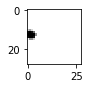

tensor([[-0.2568,  1.2425,  0.8057, -2.0361, -0.0840, -1.0557, -0.6302,  2.1606,
         -4.8867, -4.3656, 10.6709]], grad_fn=<AddmmBackward>)
tensor(10)


In [16]:
import cv2
import torch.nn.functional as F
import torch.nn as nn
import torch
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 1
image = cv2.imread('D:\\img\\ocr\\0000.png')
# print(image.shape)
net = torch.load('d:\\img\\ocr\\model\\ssm.pkl')
net.eval()
image = cv2.resize(image, (960,1280), interpolation=cv2.INTER_AREA)
# x,y,w,h = [465, 1230,28,28]
x,y,w,h = [495, 1230,28,28]
cropimg = image[y:y+h, x:x+w]
cv2.imwrite('d:\\9.png',cropimg)
plt.imshow(cropimg,'brg')
plt.show()
indata = torch.tensor(cropimg,dtype=torch.float)/255
indata = indata.permute(2,0,1).unsqueeze(0)
pred = net.forward(indata)
# pred = F.softmax(pred,dim=1)
print(pred)
print(torch.argmax(pred))
# cv2.rectangle(image, (x,y),(x+w,y+h), 0,2)
# plt.imshow(image,'brg')
# plt.show()

# print(image.shape)

In [14]:
import torch.nn.functional as F
import torch.nn as nn
import torch
import numpy as np
import cv2
# net = torch.load('d:\\img\\ocr\\model\\ssm.pkl')
image = cv2.imread('D:\\img\\test_test.png')
indata = torch.tensor(image,dtype=torch.float)/255
indata = indata.permute(2,0,1).unsqueeze(0)
pred = net.forward(indata)
print(torch.argmax(pred))

tensor(1)


# handwriting recognition with Pytorch

## 数据准备

In [29]:
#  生成训练图片
import os
import cv2
import numpy as np
import sys
from PIL import Image, ImageDraw, ImageFont
import random
import json
import numpy as np

def make_image(test_str, fonttype, fontsize, target_height, back_ground_img_list):
    font = ImageFont.truetype(fonttype, fontsize)
    text_width, text_height = font.getsize(test_str)
    pd = 20
    bg_img = cv2.imread(bg_file_lists[np.random.randint(len(back_ground_img_list))],cv2.IMREAD_COLOR)
    bg_img = cv2.resize(bg_img, (text_width+pd, target_height), interpolation=cv2.INTER_AREA)
    image = Image.fromarray(cv2.cvtColor(bg_img,cv2.COLOR_BGR2RGB)) 
#     image = Image.new("RGB", (text_width+pd, text_height), (255,255,255))
    draw = ImageDraw.Draw(image)
    
    draw.text((pd/2, 0), test_str, (0,0,0), font=font)
    #绘制噪点
    for i in range(0, 100):
        xy = (random.randrange(0, text_width+pd), random.randrange(0, target_height))
        fill_color = (random.randrange(0, 255), 0, random.randrange(50, 200))
        draw.point(xy, fill=fill_color)
        
    image = cv2.cvtColor(np.asarray(image),cv2.COLOR_RGB2BGR)  
    image = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)  
    image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)  
    
    

#     if np.random.randint(10)<7:
#     image = cv2.GaussianBlur(image,(0,0),0.60)   


    image = cv2.blur(image,(5,5))
        
#     open_cv_image = np.array(image)
    open_cv_image = image.copy()
    open_cv_image = open_cv_image[:, :, ::-1].copy()
    dif = open_cv_image.shape[0] - target_height
    if dif > 0:
        open_cv_image = open_cv_image[:-dif]
    else:
        fill = np.full((target_height, open_cv_image.shape[1], open_cv_image.shape[2]), 255, np.uint8)
        fill[:open_cv_image.shape[0],:,:] = open_cv_image
        open_cv_image = fill
    return open_cv_image

def gen_words(file_name, alphas, number=5, total=1000):
    with open(file_name, 'w') as f:
        for _ in range(total):
            line = []
            for _ in range(number):
                line.append(alphas[np.random.randint(len(alphas))])
            line.append('\n')
            line = ''.join(line)
            f.write(line)

# 生成数字字符

file_name = 'd:\\img\\ocr\\hand\\digwords.txt'
alpha = 'ABQP'
gen_words(file_name, alpha)


# 生成手写体图片
text_lines_path = 'd:\\img\\ocr\\hand\\digwords.txt'
fonts_path = 'd:\\img\\ocr\\fonts'
r = random.Random(0)
with open(text_lines_path) as f:
    text_lines = f.readlines()
text_lines = [t.strip() for t in text_lines]
text_lines = [t for t in text_lines if len(t) > 0]

all_fonts = []
all_fonts_name = []
for root, dirs, files in os.walk(fonts_path):
    for file in files:
        if file.endswith(".ttf"):
#             print(file)
            all_fonts.append(os.path.join(root, file))
            all_fonts_name.append(file[:-4])
# print('all fonts -->{}'.format(all_fonts))
output_path = "d:\\img\\ocr\\hand\\train"
output_data =[]
b_image_path = 'D:\\img\\ocr\\background'
bg_file_lists = ['{}\\{}'.format(b_image_path, x) for x in os.listdir(b_image_path)]

try:
    os.makedirs(output_path)
except:
    pass

img_height = 64
font_size = 40
number_of_examples = 100

for i, txt in enumerate(random.sample(text_lines, number_of_examples)):
    if i%100 == 0:
        print(i)
    img = make_image(txt, all_fonts[i%len(all_fonts)], font_size, img_height, bg_file_lists)
    img_path = os.path.join(output_path, str(i)+'_'+all_fonts_name[i%len(all_fonts)] + ".png")
    cv2.imwrite(img_path, img)
    output_data.append({
        "image_path": str(i)+".png",
        "gt": txt
    })
    
train_cnt = int(number_of_examples * 1.0)
val_cnt = number_of_examples - train_cnt
with open("d:\\img\\ocr\\hand\\training.json", 'w') as f:
    json.dump(output_data[:train_cnt], f)

with open("d:\\img\\ocr\\hand\\validation.json", 'w') as f:
    json.dump(output_data[train_cnt:], f)

0


In [12]:
# 生成训练库
import json
from lib.gen_dataset import createDataset
img_path = "d:\\img\\ocr\\hand\\train"
train_file = 'd:\\img\\ocr\\hand\\training.json'
valid_file = 'd:\\img\\ocr\\hand\\validation.json'
with open(train_file,'r') as f:
    train_data = json.load(f)
    


imgLabelLists = []
for item in train_data:
    imgLabelLists.append(('{}\\{}'.format(img_path, item['image_path']),str(item['gt'])))

random.shuffle(imgLabelLists)
trainPath = 'D:\\img\\dataset\\hwtrain'   # 训练数据
trainImgPaths = [x[0] for x in imgLabelLists]
trainTxtLists = [x[1] for x in imgLabelLists]
createDataset(trainPath, trainImgPaths, trainTxtLists, lexiconList=None, checkValid=True)



samples length -- > 100
d:\img\ocr\hand\train\36.png does not exist
d:\img\ocr\hand\train\9.png does not exist
d:\img\ocr\hand\train\2.png does not exist
d:\img\ocr\hand\train\59.png does not exist
d:\img\ocr\hand\train\41.png does not exist
d:\img\ocr\hand\train\83.png does not exist
d:\img\ocr\hand\train\52.png does not exist
d:\img\ocr\hand\train\42.png does not exist
d:\img\ocr\hand\train\34.png does not exist
d:\img\ocr\hand\train\61.png does not exist
d:\img\ocr\hand\train\62.png does not exist
d:\img\ocr\hand\train\77.png does not exist
d:\img\ocr\hand\train\91.png does not exist
d:\img\ocr\hand\train\12.png does not exist
d:\img\ocr\hand\train\71.png does not exist
d:\img\ocr\hand\train\14.png does not exist
d:\img\ocr\hand\train\56.png does not exist
d:\img\ocr\hand\train\99.png does not exist
d:\img\ocr\hand\train\55.png does not exist
d:\img\ocr\hand\train\22.png does not exist
d:\img\ocr\hand\train\5.png does not exist
d:\img\ocr\hand\train\66.png does not exist
d:\img\ocr\

## 数据模型 

### 原始模型 

In [53]:
import torch.nn as nn
class BidirectionalLSTM(nn.Module):
    def __init__(self, nIn, nHidden, nOut):
        super(BidirectionalLSTM, self).__init__()
        self.rnn = nn.LSTM(nIn, nHidden, bidirectional=True)
        self.embedding = nn.Linear(nHidden * 2, nOut)

    def forward(self, input):
        recurrent, _ = self.rnn(input)
        T, b, h = recurrent.size()
        t_rec = recurrent.view(T * b, h)
        output = self.embedding(t_rec)  # [T * b, nOut]
        output = output.view(T, b, -1)
        return output

class CRNN(nn.Module):
    def __init__(self, imgH, nc, nclass, nh, n_rnn=2, leakyRelu=False):
        super(CRNN, self).__init__()
        assert imgH % 16 == 0, 'imgH has to be a multiple of 16'
        ks = [3, 3, 3, 3, 3, 3, 2]
        ps = [1, 1, 1, 1, 1, 1, 0]
        ss = [1, 1, 1, 1, 1, 1, 1]
        nm = [64, 128, 256, 256, 512, 512, 512]
        cnn = nn.Sequential()

        def convRelu(i, batchNormalization=False):
            nIn = nc if i == 0 else nm[i - 1]
            nOut = nm[i]
            cnn.add_module('conv{0}'.format(i),
                           nn.Conv2d(nIn, nOut, ks[i], ss[i], ps[i]))
            if batchNormalization:
                cnn.add_module('batchnorm{0}'.format(i), nn.BatchNorm2d(nOut))
            if leakyRelu:
                cnn.add_module('relu{0}'.format(i),
                               nn.LeakyReLU(0.2, inplace=True))
            else:
                cnn.add_module('relu{0}'.format(i), nn.ReLU(True))

        convRelu(0)
        cnn.add_module('pooling{0}'.format(0), nn.MaxPool2d(2, 2))  # 64x16x64
        convRelu(1)
        cnn.add_module('pooling{0}'.format(1), nn.MaxPool2d(2, 2))  # 128x8x32
        convRelu(2, True)
        convRelu(3)
        cnn.add_module('pooling{0}'.format(2),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 256x4x16
        convRelu(4, True)
        convRelu(5)
        cnn.add_module('pooling{0}'.format(3),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 512x2x16
        convRelu(6, True)  # 512x1x16

        self.cnn = cnn
        self.rnn = nn.Sequential(
            BidirectionalLSTM(512, nh, nh),
            BidirectionalLSTM(nh, nh, nclass))

    def forward(self, input):
        # conv features
        conv = self.cnn(input)
        b, c, h, w = conv.size()
        assert h == 1, "the height of conv must be 1"
#         print('first conv size -->{}'.format(conv.size()))
        conv = conv.squeeze(2)
#         conv = conv.view(1, 512, 26).contiguous()
#         conv = con
#         print('output conv size -->{}'.format(conv.size()))
        conv = conv.permute(2, 0, 1).contiguous() # [w, b, c]

        # rnn features
        output = self.rnn(conv)
#         output = conv.view(16,-1)
        return output

### 变更模型

In [35]:
# 利用CRNN已训练的前两层参数
class CRNNHeader(nn.Module):
    def __init__(self, imgH, nc, nh, n_rnn=2, leakyRelu=False):
        super(CRNNHeader,self).__init__()
        assert imgH % 16 == 0, 'imgH has to be a multiple of 16'
        ks = [3, 3, 3, 3, 3, 3, 2]
        ps = [1, 1, 1, 1, 1, 1, 0]
        ss = [1, 1, 1, 1, 1, 1, 1]
        nm = [64, 128, 256, 256, 512, 512, 512]
        cnn = nn.Sequential()

        def convRelu(i, batchNormalization=False):
            nIn = nc if i == 0 else nm[i - 1]
            nOut = nm[i]
            cnn.add_module('conv{0}'.format(i),
                           nn.Conv2d(nIn, nOut, ks[i], ss[i], ps[i]))
            if batchNormalization:
                cnn.add_module('batchnorm{0}'.format(i), nn.BatchNorm2d(nOut))
            if leakyRelu:
                cnn.add_module('relu{0}'.format(i),
                               nn.LeakyReLU(0.2, inplace=True))
            else:
                cnn.add_module('relu{0}'.format(i), nn.ReLU(True))

        convRelu(0)
        cnn.add_module('pooling{0}'.format(0), nn.MaxPool2d(2, 2))  # 64x16x64
        convRelu(1)
        cnn.add_module('pooling{0}'.format(1), nn.MaxPool2d(2, 2))  # 128x8x32
        convRelu(2, True)
        convRelu(3)
        cnn.add_module('pooling{0}'.format(2),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 256x4x16
        convRelu(4, True)
        convRelu(5)
        cnn.add_module('pooling{0}'.format(3),
                       nn.MaxPool2d((2, 2), (2, 1), (0, 1)))  # 512x2x16
        convRelu(6, True)  # 512x1x16
        self.cnn = cnn
        self.head_rnn = BidirectionalLSTM(512, nh, nh)
        
class CRNNClassify(CRNNHeader):
    def __init__(self, imgH, nc, nh, nclass, n_rnn=2, leakyRelu=False):
        super(CRNNClassify, self).__init__(imgH, nc,nh, leakyRelu=leakyRelu)
        self.fc = BidirectionalLSTM(nh,nh, nclass)

    def forward(self, input):
        # conv features
        conv = self.cnn(input)
        b, c, h, w = conv.size()
        assert h == 1, "the height of conv must be 1"
#         print('first conv size -->{}'.format(conv.size()))
        conv = conv.squeeze(2)
#         conv = conv.view(1, 512, 26).contiguous()
#         conv = con
#         print('output conv size -->{}'.format(conv.size()))
        conv = conv.permute(2, 0, 1).contiguous() # [w, b, c]

        # rnn features
        output = self.head_rnn(conv)
        output = self.rnn(output)
#         output = conv.view(16,-1)
        return output

In [36]:
# transform parameter
import torch
import copy
digest = '0123456789+-÷×='
# 17 = len(digest) + unknow + blank
dnet = CRNNClassify(32,1,17,256)
net = CRNN(32, 1, 37, 256)
net.load_state_dict(torch.load('d:\\img\\ocr\\model\\crnn.pth'))


<All keys matched successfully>

In [41]:
# net.cnn.conv0.__dict__
dnet.cnn = copy.deepcopy(net.cnn)
dnet.head_rnn = copy.deepcopy(net.rnn[0])
# net.rnn[0].rnn.__dict__
torch.save(dnet,'d:\\img\\ocr\\model\\digest_crnn.pkl')


d:\project_tw\twedu\venv37\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type CRNNClassify. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "
d:\project_tw\twedu\venv37\lib\site-packages\torch\serialization.py:256: UserWarning: Couldn't retrieve source code for container of type BidirectionalLSTM. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


## 训练

## 验证

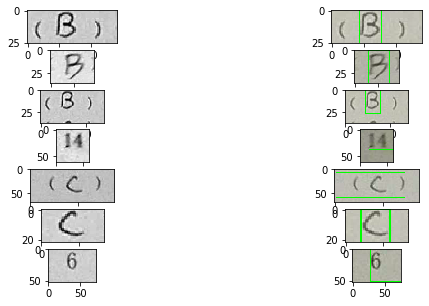

In [128]:
# 取图片文字范围
import cv2
import matplotlib.pyplot as plt
import lib.image_utils as utils
import numpy as np
import importlib
plt.rcParams['figure.figsize'] = 10, 5
importlib.reload(utils)
images_name = ['B_4.png','B_1.png','B_2.png','14_2.png','C_4.png','C_2.png','6_1.png']
# images_name = ['11_1.png']
# idx = 0
# img = cv2.imread('d:\\img\\exam\\{}'.format(images_name[idx]),cv2.IMREAD_COLOR)
# print(img.shape)
# img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# cnts = utils.detect_char_area(img,min_area=80)
# print(cnts)
plt.figure()
col_num = 2
row_num = len(images_name)
for idx in range(len(images_name)):
    img = cv2.imread('d:\\img\\exam\\{}'.format(images_name[idx]),cv2.IMREAD_COLOR)
    origin_img = img.copy()
    img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.subplot(row_num,2, idx*2 + 1)
    plt.imshow(img,'gray')
    x1,y1,x2,y2 = utils.detect_char_area(img,min_area=80)
#     areas = np.array(cnts,dtype=np.uint8)
#     print('areas -->', areas)
#     areas_max = np.argmax(areas[:,4], axis=0)
#     x1,y1,x2,y2,_ = areas[areas_max]
#     cent_y = y1 + int((y2-y1)/2)
#     print('cent_y -->', cent_y)
#     areas_cents = [int((x[3] - x[1])/2 + x[1])  for x in areas]
#     areas_filter_idx = np.where(abs(areas_cents - cent_y) < 10)
#     print('areas_filter_idx -->', areas_filter_idx)
#     x1,y1,x2,y2 = np.min(areas[areas_filter_idx,0]),np.min(areas[areas_filter_idx,1]),np.max(areas[areas_filter_idx,2]),np.max(areas[areas_filter_idx,3])
    cv2.rectangle(origin_img,(x1,y1),(x2,y2),(0,255,0),1)
    plt.subplot(row_num,2, idx*2 + 2)
    plt.imshow(origin_img,'brg')
plt.show()



In [52]:
areas

148

In [58]:
import torch
from PIL import Image
from torch.autograd import Variable
import lib.dataset as dataset
import importlib
import cv2
importlib.reload(dataset)
net = CRNN(32, 1, 37, 256)
net.load_state_dict(torch.load('d:\\img\\ocr\\model\\crnn.pth'))
transformer = dataset.resizeNormalize((100, 32))
image = Image.open('d:\\img\\char2.jpg').convert('L')
# image = cv2.imread('d:\\img\\char2.jpg', cv2.IMREAD_GRAYSCALE)
# print(image.shape)
image = transformer(image)
image = image.unsqueeze(0)
image = Variable(image)
print(image.size())
# print(net)
alphabet = '0123456789abcdefghijklmnopqrstuvwxyz'
pred = net(image)
print('111111111', pred.size())
pred = pred.view(pred.size(0), -1)
print(pred.size())
print(torch.argmax(pred, dim=1))
# print(alphabet[34])
# torch.save(net,'d:\\img\\ocr\\model\\crnn_custom.pkl')


torch.Size([1, 1, 32, 100])
111111111 torch.Size([26, 1, 37])
torch.Size([26, 37])
tensor([3, 0, 0, 0, 0, 0, 0, 8, 0, 0, 4, 0, 0, 0, 0, 0, 3, 0, 0, 0, 2, 0, 1, 0,
        0, 0])
